# Projet 6 : Classifiez automatiquement des biens de consommation


 L’entreprise "Place de marché”, qui souhaite lancer une marketplace e-commerce.Sur la place de marché, des vendeurs proposent des articles à des acheteurs en postant **une photo et une description**.
 
Pour rendre l’expérience utilisateur des vendeurs (faciliter la mise en ligne de nouveaux articles) et des acheteurs (faciliter la recherche de produits) la plus fluide possible, et dans l'optique d'un passage à l'échelle, il devient nécessaire d'automatiser cette tâche.

Linda, Lead Data Scientist, vous demande donc d'étudier la faisabilité d'un moteur de classification des articles en différentes catégories, avec un niveau de précision suffisant.


Afin d’extraire les features texte, il sera nécessaire de mettre en œuvre : 
- deux approches de type “bag-of-words”, comptage simple de mots et Tf-idf ;
- une approche de type word/sentence embedding classique avec Word2Vec (ou Glove ou FastText) ;
- une approche de type word/sentence embedding avec BERT ;
- une approche de type word/sentence embedding avec USE (Universal Sentence Encoder).


# Préparation initiale dataset, filtrage des données et Exploration des données

In [1]:
# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Importation et nettoyage des données

Importons d'abord les descriptions, les noms de produits et les catégories et plaçons-les dans un dataframe(df)


In [2]:
# Lecture des données

data= pd.read_csv(r"C:\Users\kherm\Documents\Openclassrooms\projet 6\Flipkart\flipkart_com-ecommerce_sample_1050.csv",
                 sep=',', 
                 index_col = 'uniq_id',
                 encoding ='utf-8')

df=data.copy()

df.head()

crawl_timestamp   
uniq_id                                                       
55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000  \
7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                                                        product_url   
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  http://www.flipkart.com/elegance-polyester-mul...  \
7b72c92c2f6c40268628ec5f14c6d590  http://www.flipkart.com/sathiyas-cotton-bath-t...   
64d5d4a258243731dc7bbb1eef49ad74  http://www.flipkart.com/eurospa-cotton-terry-f...   
d4684dcdc759dd9cdf41504698d737d8  http://www.flipkart.com/santosh-royal-fashion-...   
6325b6870c54cd47be6ebfbffa620ec7  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                                                       product_name   
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  Elegance Polyester Multicolor Abstract Eyelet ...  \
7b72c92c2f6c40268628ec5f14c6d590                         Sathiyas Cotton Bath Towel   
64d5d4a258243731dc7bbb1eef49ad74                Eurospa Cotton Terry Face Towel Set   
d4684dcdc759dd9cdf41504698d737d8  SANTOSH ROYAL FASHION Cotton Printed King size...   
6325b6870c54cd47be6ebfbffa620ec7  Jaipur Print Cotton Floral King sized Double B...   

                                                              product_category_tree   
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  ["Home Furnishing >> Curtains & Accessories >>...  \
7b72c92c2f6c40268628ec5f14c6d590  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
64d5d4a258243731dc7bbb1eef49ad74  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
d4684dcdc759dd9cdf41504698d737d8  ["Home Furnishing >> Bed Linen >> Bedsheets >>...   
6325b6870c54cd47be6ebfbffa620ec7  ["Home Furnishing >> Bed Linen >> Bedsheets >>...   

                                               pid  retail_price   
uniq_id                                                            
55b85ea15a1536d46b7190ad6fff8ce7  CRNEG7BKMFFYHQ8Z        1899.0  \
7b72c92c2f6c40268628ec5f14c6d590  BTWEGFZHGBXPHZUH         600.0   
64d5d4a258243731dc7bbb1eef49ad74  BTWEG6SHXTDB2A2Y           NaN   
d4684dcdc759dd9cdf41504698d737d8  BDSEJT9UQWHDUBH4        2699.0   
6325b6870c54cd47be6ebfbffa620ec7  BDSEJTHNGWVGWWQU        2599.0   

                                  discounted_price   
uniq_id                                              
55b85ea15a1536d46b7190ad6fff8ce7             899.0  \
7b72c92c2f6c40268628ec5f14c6d590             449.0   
64d5d4a258243731dc7bbb1eef49ad74               NaN   
d4684dcdc759dd9cdf41504698d737d8            1299.0   
6325b6870c54cd47be6ebfbffa620ec7             698.0   

                                                                 image   
uniq_id                                                                  
55b85ea15a1536d46b7190ad6fff8ce7  55b85ea15a1536d46b7190ad6fff8ce7.jpg  \
7b72c92c2f6c40268628ec5f14c6d590  7b72c92c2f6c40268628ec5f14c6d590.jpg   
64d5d4a258243731dc7bbb1eef49ad74  64d5d4a258243731dc7bbb1eef49ad74.jpg   
d4684dcdc759dd9cdf41504698d737d8  d4684dcdc759dd9cdf41504698d737d8.jpg   
6325b6870c54cd47be6ebfbffa620ec7  6325b6870c54cd47be6ebfbffa620ec7.jpg   

                                  is_FK_Advantage_product   
uniq_id                                                     
55b85ea15a1536d46b7190ad6fff8ce7                    False  \
7b72c92c2f6c40268628ec5f14c6d590                    False   
64d5d4a258243731dc7bbb1eef49ad74                    False   
d4684dcdc759dd9cdf41504698d737d8                    False   
6325b6870c54cd47be6ebfbffa620ec

In [3]:
df.shape

(1050, 14)

Le fichier contient 1050 produits et 14 colonnes. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1050 entries, 55b85ea15a1536d46b7190ad6fff8ce7 to f2f027ad6a6df617c9f125173da71e44
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   crawl_timestamp          1050 non-null   object 
 1   product_url              1050 non-null   object 
 2   product_name             1050 non-null   object 
 3   product_category_tree    1050 non-null   object 
 4   pid                      1050 non-null   object 
 5   retail_price             1049 non-null   float64
 6   discounted_price         1049 non-null   float64
 7   image                    1050 non-null   object 
 8   is_FK_Advantage_product  1050 non-null   bool   
 9   description              1050 non-null   object 
 10  product_rating           1050 non-null   object 
 11  overall_rating           1050 non-null   object 
 12  brand                    712 non-null    object 
 13  product_specifications  

In [5]:
#Fonction pour résumer les données

def tableau_resume(data,nom,nom_id):
    #Création d'un tableau résumant les données 
    tableau_resume = pd.DataFrame(columns = ["Nombre lignes", "Nombre colonnes", "Taux remplissage moyen","Doublons"],index=[nom])
    
# Calcul du nombre de lignes dans chaque fichier
# La méthode .index() permet de calculer le nombre de lignes total pour chaque fichier
    tableau_resume["Nombre lignes"] = [
        len(data.index)
    ]
# Calcul du nombre de colonnes dans chaque fichier
# La méthode .columns() permet de calculer le nombre de colonnes total pour chaque fichier
    tableau_resume["Nombre colonnes"] = [
        len(data.columns)
    ]
# Fonction pour calculer le pourcentage de remplissage
    def pourcentage(x):
        return "{0:.01f}%".format(x * 100)
# Calcul du taux de remplissage moyen
# On identifie les valeurs avec méthode .notna()
# On utilise la méthode .mean() deux fois : uns fois pour calculer la moyenne de chaque colonne et une deuxième fois pour calculer la moyenne du fichier
    tableau_resume["Taux remplissage moyen"] = [
        pourcentage(data.notna().mean().mean())
    ]
# Calcul des doublons dans chaque fichier
# Les méthodes .duplicated() et .sum() permettent de retrouver les doublons et les sommer per fichier
    tableau_resume["Doublons"] = [
        data.duplicated(subset=[nom_id]).sum()
    ]
    return tableau_resume

In [6]:
# Fonction pour calculer le pourcentage de données manquantes avec classement en ordre décroissant 

def missing(data):
    products_dict = {}
    
    for col in data.columns:
        products_dict[col] = []
        products_dict[col].append(round((data[col].isnull().sum()/data.shape[0])*100,2))
        products_dict[col].append(data[col].isna().sum())
        
    return pd.DataFrame.from_dict(data=products_dict, orient="index", columns = ["Pourcentage Valeurs Manquantes", "Nombre de valeurs manquantes"]).sort_values(by="Pourcentage Valeurs Manquantes", ascending=False)


In [7]:
tableau_resume(df,"Fichier Texte","pid")

Nombre lignes  Nombre colonnes Taux remplissage moyen  Doublons
Fichier Texte           1050               14                  97.7%         0

Il n'y a pas de doublons dans le fichier et toutes les colonnes sont presque remplies.

In [8]:
missing(df)

Pourcentage Valeurs Manquantes   
brand                                             32.19  \
retail_price                                       0.10   
discounted_price                                   0.10   
product_specifications                             0.10   
crawl_timestamp                                    0.00   
product_url                                        0.00   
product_name                                       0.00   
product_category_tree                              0.00   
pid                                                0.00   
image                                              0.00   
is_FK_Advantage_product                            0.00   
description                                        0.00   
product_rating                                     0.00   
overall_rating                                     0.00   

                         Nombre de valeurs manquantes  
brand                                             338  
retail_price                                        1  
discounted_price                                    1  
product_specifications                              1  
crawl_timestamp                                     0  
product_url                                         0  
product_name                                        0  
product_category_tree                               0  
pid                                                 0  
image                                               0  
is_FK_Advantage_product                             0  
description                                         0  
product_rating                                      0  
overall_rating                                      0

### Traitement des valeurs manquantes de Brand type, retail price, product specification et discounted price

Nous allons remplacer les marques non connues par 'Unknown'ou des valeurs manquantes dans les colonnes numériques par la valeur médiane.

In [9]:
#Define a function to replace missing rows in columns
def replace_null(df, col):
    if df[col].dtypes == "object":
        df[col] = np.where(df[col].isnull(), "unknown", df[col]) #replace missing rows in a categorical column with unkownn
    else:
        median = df[col].median()
        df.loc[df[col].isnull(), col] = median #missing rows in a numerical column with the median values
    return df

In [10]:
#Create a list of column names
col_null_values = ['brand','retail_price','discounted_price','product_specifications']

#Apply replace null function
for c in col_null_values:
    replace_null(df, c)

In [11]:
tableau_resume(df,"Fichier Texte","pid")

Nombre lignes  Nombre colonnes Taux remplissage moyen  Doublons
Fichier Texte           1050               14                 100.0%         0

### Traitement des outliers 

In [12]:
df.describe().T

count         mean          std   min     25%    50%   
retail_price      1050.0  2185.066667  7635.675245  35.0  555.75  999.0  \
discounted_price  1050.0  1583.589524  7471.597643  35.0  340.00  600.0   

                     75%       max  
retail_price      1999.0  201000.0  
discounted_price  1199.0  201000.0

retail_price
Skew : 19.79


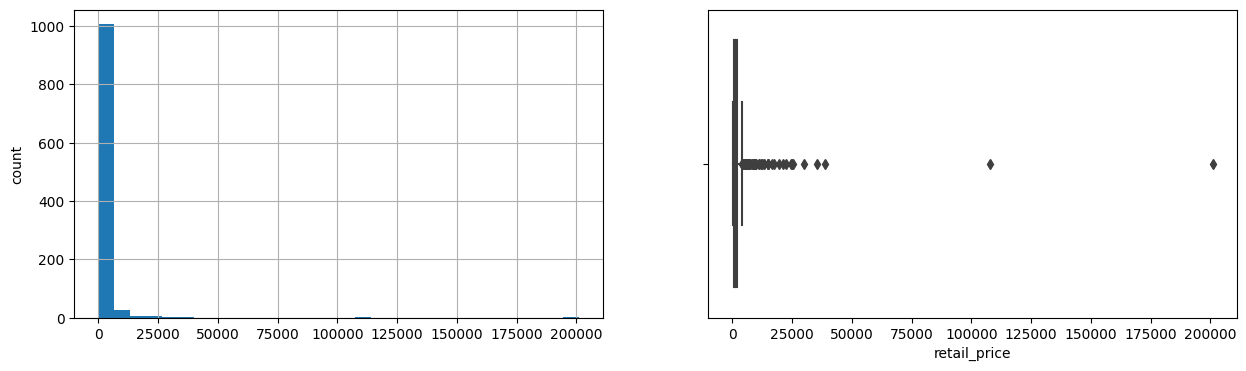

discounted_price
Skew : 21.23


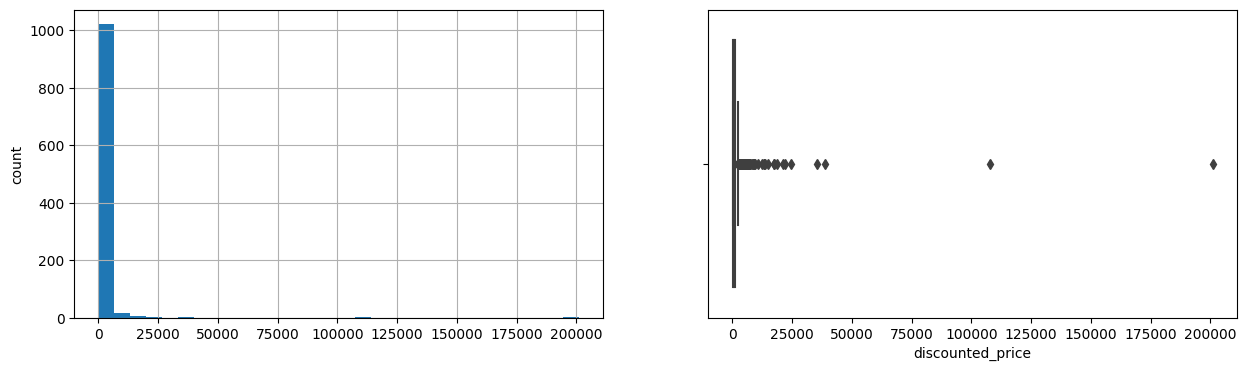

In [13]:
#Liste de variables numériques
num_col = ['retail_price','discounted_price']

# Affichage des distributions et des boxplots pour les données
for col in num_col:   
    print(col)
    print('Skew :',round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=30)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=col, data = df)
    plt.show()

In [14]:
outliers = df[(df["retail_price"] > 100000)
              | (df["discounted_price"] > 100000)
                           
                             ] 

print(f"Nombre d'observations avec une ou plusieurs valeurs supérieures à 100 sur les variables nutritionnelles: {outliers.shape[0]}")
print("5 premières valeurs aberrantes: ")
display(outliers.head())

Nombre d'observations avec une ou plusieurs valeurs supérieures à 100 sur les variables nutritionnelles: 2
5 premières valeurs aberrantes: 


crawl_timestamp   
uniq_id                                                       
710ed5f2393a4b9e8823aa0029f71f93  2015-12-04 07:25:36 +0000  \
08452abdadb3db1e686b94a9c52fc7b6  2015-12-04 07:25:36 +0000   

                                                                        product_url   
uniq_id                                                                               
710ed5f2393a4b9e8823aa0029f71f93  http://www.flipkart.com/tag-heuer-cau1116-ba08...  \
08452abdadb3db1e686b94a9c52fc7b6  http://www.flipkart.com/cartier-w6701005-analo...   

                                                                       product_name   
uniq_id                                                                               
710ed5f2393a4b9e8823aa0029f71f93  TAG Heuer CAU1116.BA0858 Formula 1 Analog Watc...  \
08452abdadb3db1e686b94a9c52fc7b6     Cartier W6701005 Analog Watch  - For Boys, Men   

                                                              product_category_tree   
uniq_id                                                                               
710ed5f2393a4b9e8823aa0029f71f93  ["Watches >> Wrist Watches >> TAG Heuer Wrist ...  \
08452abdadb3db1e686b94a9c52fc7b6  ["Watches >> Wrist Watches >> Cartier Wrist Wa...   

                                               pid  retail_price   
uniq_id                                                            
710ed5f2393a4b9e8823aa0029f71f93  WATEA6UGFGKZKDJC      107750.0  \
08452abdadb3db1e686b94a9c52fc7b6  WATEAK8SE2RUK7GM      201000.0   

                                  discounted_price   
uniq_id                                              
710ed5f2393a4b9e8823aa0029f71f93          107750.0  \
08452abdadb3db1e686b94a9c52fc7b6          201000.0   

                                                                 image   
uniq_id                                                                  
710ed5f2393a4b9e8823aa0029f71f93  710ed5f2393a4b9e8823aa0029f71f93.jpg  \
08452abdadb3db1e686b94a9c52fc7b6  08452abdadb3db1e686b94a9c52fc7b6.jpg   

                                  is_FK_Advantage_product   
uniq_id                                                     
710ed5f2393a4b9e8823aa0029f71f93                    False  \
08452abdadb3db1e686b94a9c52fc7b6                    False   

                                                                        description   
uniq_id                                                                               
710ed5f2393a4b9e8823aa0029f71f93  TAG Heuer CAU1116.BA0858 Formula 1 Analog Watc...  \
08452abdadb3db1e686b94a9c52fc7b6  Cartier W6701005 Analog Watch  - For Boys, Men...   

                                       product_rating       overall_rating   
uniq_id                                                                      
710ed5f2393a4b9e8823aa0029f71f93  No rating available  No rating available  \
08452abdadb3db1e686b94a9c52fc7b6  No rating available  No rating available   

                                    brand   
uniq_id                                     
710ed5f2393a4b9e8823aa0029f71f93  unknown  \
08452abdadb3db1e686b94a9c52fc7b6  unknown   

                                                             product_specifications  
uniq_id                                                                              
710ed5f2393a4b9e8823aa0029f71f93  {"product_specification"=>[{"key"=>"Chronograp...  
08452abdadb3db1e686b94a9c52fc7b6  {"product_specification"=>[{"key"=>"Chronograp...

Ces prix paraissent représentatifs des items proposés TAG et Cartier qui sont des marques avec des prix élevés. On aurait enlevé ces variables pour une première modélisation (éviter les bruit).Cependant, vu qu'on ne s'intéresse pas à ces variables, il n'est pas nécessaire de les traiter. 

## 2. Exploration des données

In [15]:
df.nunique()

crawl_timestamp             149
product_url                1050
product_name               1050
product_category_tree       642
pid                        1050
retail_price                354
discounted_price            424
image                      1050
is_FK_Advantage_product       2
description                1050
product_rating               27
overall_rating               27
brand                       491
product_specifications      985
dtype: int64

In [16]:
df.dtypes

crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
dtype: object

In [17]:
df.product_rating.unique()

array(['No rating available', '5', '1', '2.3', '2.7', '4.5', '4', '3.8',
       '4.3', '3.7', '3.6', '3.5', '4.1', '4.9', '3.1', '4.2', '4.8',
       '4.4', '3.9', '3', '3.3', '2.5', '2', '4.7', '2.2', '3.2', '1.5'],
      dtype=object)

In [18]:
df[df['product_rating']=='No rating available']

crawl_timestamp   
uniq_id                                                       
55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000  \
7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   
...                                                     ...   
be0f39341d771aac57084970f1ed6425  2015-12-01 10:15:43 +0000   
958f54f4c46b53c8a0a9b8167d9140bc  2015-12-01 10:15:43 +0000   
fd6cbcc22efb6b761bd564c28928483c  2015-12-01 10:15:43 +0000   
5912e037d12774bb73a2048f35a00009  2015-12-01 10:15:43 +0000   
c3edc504d1b4f0ba6224fa53a43a7ad6  2015-12-01 10:15:43 +0000   

                                                                        product_url   
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  http://www.flipkart.com/elegance-polyester-mul...  \
7b72c92c2f6c40268628ec5f14c6d590  http://www.flipkart.com/sathiyas-cotton-bath-t...   
64d5d4a258243731dc7bbb1eef49ad74  http://www.flipkart.com/eurospa-cotton-terry-f...   
d4684dcdc759dd9cdf41504698d737d8  http://www.flipkart.com/santosh-royal-fashion-...   
6325b6870c54cd47be6ebfbffa620ec7  http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                                             ...   
be0f39341d771aac57084970f1ed6425  http://www.flipkart.com/wallmantra-medium-viny...   
958f54f4c46b53c8a0a9b8167d9140bc  http://www.flipkart.com/oren-empower-extra-lar...   
fd6cbcc22efb6b761bd564c28928483c  http://www.flipkart.com/wallmantra-large-vinyl...   
5912e037d12774bb73a2048f35a00009  http://www.flipkart.com/uberlyfe-extra-large-p...   
c3edc504d1b4f0ba6224fa53a43a7ad6  http://www.flipkart.com/wallmantra-medium-viny...   

                                                                       product_name   
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  Elegance Polyester Multicolor Abstract Eyelet ...  \
7b72c92c2f6c40268628ec5f14c6d590                         Sathiyas Cotton Bath Towel   
64d5d4a258243731dc7bbb1eef49ad74                Eurospa Cotton Terry Face Towel Set   
d4684dcdc759dd9cdf41504698d737d8  SANTOSH ROYAL FASHION Cotton Printed King size...   
6325b6870c54cd47be6ebfbffa620ec7  Jaipur Print Cotton Floral King sized Double B...   
...                                                                             ...   
be0f39341d771aac57084970f1ed6425           Wallmantra Medium Vinyl Stickers Sticker   
958f54f4c46b53c8a0a9b8167d9140bc     Oren Empower Extra Large Self Adhesive Sticker   
fd6cbcc22efb6b761bd564c28928483c             Wallmantra Large Vinyl Sticker Sticker   
5912e037d12774bb73a2048f35a00009  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
c3edc504d1b4f0ba6224fa53a43a7ad6            Wallmantra Medium Vinyl Sticker Sticker   

                                                              product_category_tree   
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  ["Home Furnishing >> Curtains & Accessories >>...  \
7b72c92c2f6c40268628ec5f14c6d590  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
64d5d4a258243731dc7bbb1eef49ad74  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
d4684dcdc759dd9cdf41504698d737d8  ["Home Furnishing >> Bed Linen >> Bedsheets >>...   
6325b6870c54cd47be6ebfbffa620ec7  ["Home Furnishing >> Bed Linen >> Bedsheets >>...   
...                                                                             ...   
be0f39341d771aac57084970f1ed6425  ["Baby Care >> Baby & Kids Gifts >> Stickers >...   
958f54f4c46b53c8a0a9b8167d9140bc  ["Baby Care >> Baby & Kids Gifts >> Stickers >...   
fd6cbcc22efb6b761bd564c28928483c  ["Baby Care >> Baby & Kids Gifts >> Stickers >...   
591

La majorité des produits n'ont pas de notes.

In [19]:
df.describe(include=object).T

count unique   
crawl_timestamp         1050    149  \
product_url             1050   1050   
product_name            1050   1050   
product_category_tree   1050    642   
pid                     1050   1050   
image                   1050   1050   
description             1050   1050   
product_rating          1050     27   
overall_rating          1050     27   
brand                   1050    491   
product_specifications  1050    985   

                                                                      top freq  
crawl_timestamp                                 2015-12-01 12:40:44 +0000  150  
product_url             http://www.flipkart.com/elegance-polyester-mul...    1  
product_name            Elegance Polyester Multicolor Abstract Eyelet ...    1  
product_category_tree   ["Home Furnishing >> Bed Linen >> Blankets, Qu...   56  
pid                                                      CRNEG7BKMFFYHQ8Z    1  
image                                55b85ea15a1536d46b7190ad6fff8ce7.jpg    1  
description             Key Features of Elegance Polyester Multicolor ...    1  
product_rating                                        No rating available  889  
overall_rating                                        No rating available  889  
brand                                                             unknown  338  
product_specifications  {"product_specification"=>[{"key"=>"Type", "va...   22

In [20]:
df['product_category_tree'].nunique()

642

In [21]:
df['product_category_tree'][743]

'["Kitchen & Dining >> Containers & Bottles >> Bottles & Sippers >> Water bottle >> Nutcase Water bottle"]'

In [22]:
# Determining the maximum tree depth of categories

ser_depth = df['product_category_tree'].apply(lambda x: x.count('>>'))
max_depth = ser_depth.max()
max_depth

6

In [23]:
# Converting the strings in 'product_category_tree' column in 6 categ columns

def str_cleaning(ind, my_str, name_level_cols):
    my_str = my_str.replace("[\"", "").replace("\"]", "")
    tab_str = my_str.split(">>")
    size_tab_str = len(tab_str)
    tup_str = tuple([tab_str[i].strip() if i<size_tab_str else "" \
                     for i in np.arange(max_depth) ])
    return tup_str

name_level_cols = ['cat_level_'+str(i) for i in np.arange(max_depth)]
ser_tuple = df['product_category_tree']\
    .apply(lambda s: str_cleaning(s.index, s, name_level_cols))
df_cat_level = pd.DataFrame([[a,'/'.join([a,b]),'/'.join([a,b,c]),
                              '/'.join([a,b,c,d]),'/'.join([a,b,c,d,e]),
                              '/'.join([a,b,c,d,e,f])] \
                             for a,b,c,d,e,f in ser_tuple.values],
                            columns=name_level_cols, index=df.index)

In [24]:
# printing number of categories in each level and a sample
display(df_cat_level.nunique(), df_cat_level.sample(3))

cat_level_0      7
cat_level_1     62
cat_level_2    243
cat_level_3    460
cat_level_4    596
cat_level_5    633
dtype: int64

cat_level_0   
uniq_id                                                        
5531b9f454e2d75cfe00c3f795e06de5            Kitchen & Dining  \
c36ea960a14f164ee0f39ad6beb3796a                     Watches   
216c6c3527984be3d7ad9023d5cd9bd1  Home Decor & Festive Needs   

                                                                        cat_level_1   
uniq_id                                                                               
5531b9f454e2d75cfe00c3f795e06de5                       Kitchen & Dining/Coffee Mugs  \
c36ea960a14f164ee0f39ad6beb3796a                              Watches/Wrist Watches   
216c6c3527984be3d7ad9023d5cd9bd1  Home Decor & Festive Needs/Table Decor & Handi...   

                                                                        cat_level_2   
uniq_id                                                                               
5531b9f454e2d75cfe00c3f795e06de5  Kitchen & Dining/Coffee Mugs/Rockmantra Coffee...  \
c36ea960a14f164ee0f39ad6beb3796a         Watches/Wrist Watches/Sonata Wrist Watches   
216c6c3527984be3d7ad9023d5cd9bd1  Home Decor & Festive Needs/Table Decor & Handi...   

                                                                        cat_level_3   
uniq_id                                                                               
5531b9f454e2d75cfe00c3f795e06de5  Kitchen & Dining/Coffee Mugs/Rockmantra Coffee...  \
c36ea960a14f164ee0f39ad6beb3796a        Watches/Wrist Watches/Sonata Wrist Watches/   
216c6c3527984be3d7ad9023d5cd9bd1  Home Decor & Festive Needs/Table Decor & Handi...   

                                                                        cat_level_4   
uniq_id                                                                               
5531b9f454e2d75cfe00c3f795e06de5  Kitchen & Dining/Coffee Mugs/Rockmantra Coffee...  \
c36ea960a14f164ee0f39ad6beb3796a       Watches/Wrist Watches/Sonata Wrist Watches//   
216c6c3527984be3d7ad9023d5cd9bd1  Home Decor & Festive Needs/Table Decor & Handi...   

                                                                        cat_level_5  
uniq_id                                                                              
5531b9f454e2d75cfe00c3f795e06de5  Kitchen & Dining/Coffee Mugs/Rockmantra Coffee...  
c36ea960a14f164ee0f39ad6beb3796a      Watches/Wrist Watches/Sonata Wrist Watches///  
216c6c3527984be3d7ad9023d5cd9bd1  Home Decor & Festive Needs/Table Decor & Handi...

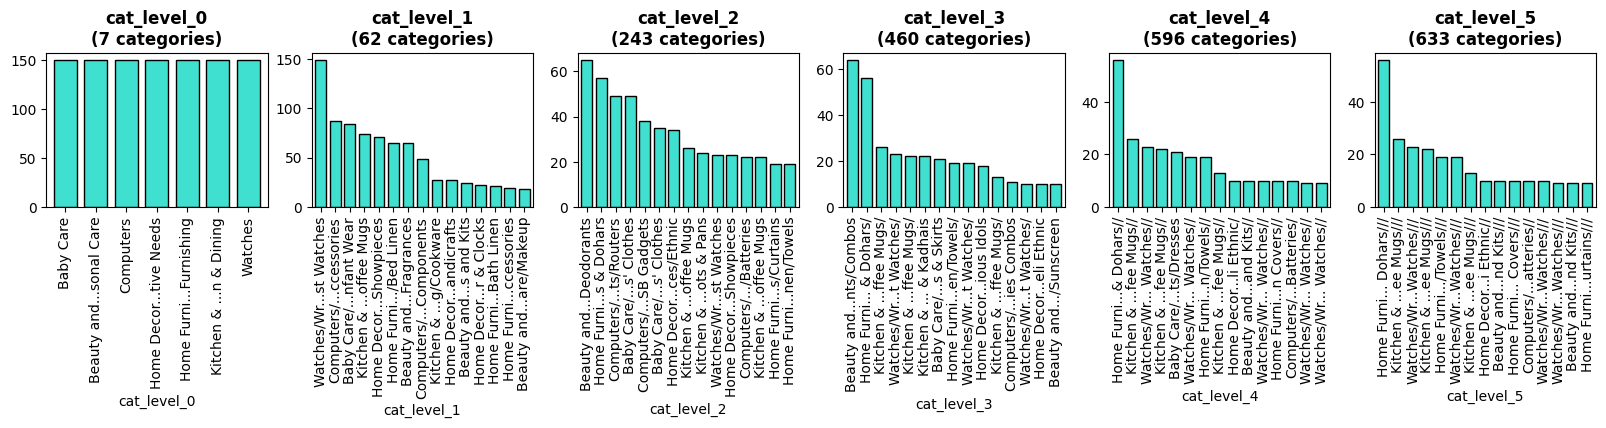

In [25]:
shorten_label = 10
n_first = 15
fig = plt.figure(figsize=(20,2))
for i, col in enumerate(df_cat_level.columns,1):
    # plot the graphs
    ax = fig.add_subplot(1,len(df_cat_level.columns), i)
    ser = df_cat_level.groupby(col).size().sort_values(ascending=False)
    ser[0:n_first].plot.bar(width=0.75, color='turquoise', ec='k', ax=ax)
    # shorten the labels
    thr = int(shorten_label)
    lab_x = [item.get_text() for item in ax.get_xticklabels()]
    short_lab_x = [s[:thr]+'...'+s[-thr:] if len(s)>thr else s for s in lab_x]
    ax.axes.set_xticklabels(short_lab_x)
    # set title
    ax.set_title(col+f'\n({ser.shape[0]} categories)', fontweight='bold')

Le seul niveau qui a un ensemble équilibré au niveau des éléments est le niveau 0, avec 7 catégories. Renommons ces 7 catégories :

In [27]:
df_cat_level['cat_level_0'].unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

In [28]:
df_cat_level['category'] = \
    df_cat_level['cat_level_0'].replace({'Home Furnishing': 'Furnishing',
                                         'Baby Care': 'Baby', 
                                         'Watches': 'Watches',
                                         'Home Decor & Festive Needs': 'Decor',
                                         'Kitchen & Dining': 'Kitchen',
                                         'Beauty and Personal Care': 'Beauty',
                                         'Computers': 'Computers'})

In [29]:
df_cat_level.head()

cat_level_0   
uniq_id                                             
55b85ea15a1536d46b7190ad6fff8ce7  Home Furnishing  \
7b72c92c2f6c40268628ec5f14c6d590        Baby Care   
64d5d4a258243731dc7bbb1eef49ad74        Baby Care   
d4684dcdc759dd9cdf41504698d737d8  Home Furnishing   
6325b6870c54cd47be6ebfbffa620ec7  Home Furnishing   

                                                             cat_level_1   
uniq_id                                                                    
55b85ea15a1536d46b7190ad6fff8ce7  Home Furnishing/Curtains & Accessories  \
7b72c92c2f6c40268628ec5f14c6d590              Baby Care/Baby Bath & Skin   
64d5d4a258243731dc7bbb1eef49ad74              Baby Care/Baby Bath & Skin   
d4684dcdc759dd9cdf41504698d737d8               Home Furnishing/Bed Linen   
6325b6870c54cd47be6ebfbffa620ec7               Home Furnishing/Bed Linen   

                                                                      cat_level_2   
uniq_id                                                                             
55b85ea15a1536d46b7190ad6fff8ce7  Home Furnishing/Curtains & Accessories/Curtains  \
7b72c92c2f6c40268628ec5f14c6d590      Baby Care/Baby Bath & Skin/Baby Bath Towels   
64d5d4a258243731dc7bbb1eef49ad74      Baby Care/Baby Bath & Skin/Baby Bath Towels   
d4684dcdc759dd9cdf41504698d737d8              Home Furnishing/Bed Linen/Bedsheets   
6325b6870c54cd47be6ebfbffa620ec7              Home Furnishing/Bed Linen/Bedsheets   

                                                                        cat_level_3   
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  Home Furnishing/Curtains & Accessories/Curtain...  \
7b72c92c2f6c40268628ec5f14c6d590  Baby Care/Baby Bath & Skin/Baby Bath Towels/Sa...   
64d5d4a258243731dc7bbb1eef49ad74  Baby Care/Baby Bath & Skin/Baby Bath Towels/Eu...   
d4684dcdc759dd9cdf41504698d737d8  Home Furnishing/Bed Linen/Bedsheets/SANTOSH RO...   
6325b6870c54cd47be6ebfbffa620ec7  Home Furnishing/Bed Linen/Bedsheets/Jaipur Pri...   

                                                                        cat_level_4   
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  Home Furnishing/Curtains & Accessories/Curtain...  \
7b72c92c2f6c40268628ec5f14c6d590  Baby Care/Baby Bath & Skin/Baby Bath Towels/Sa...   
64d5d4a258243731dc7bbb1eef49ad74  Baby Care/Baby Bath & Skin/Baby Bath Towels/Eu...   
d4684dcdc759dd9cdf41504698d737d8  Home Furnishing/Bed Linen/Bedsheets/SANTOSH RO...   
6325b6870c54cd47be6ebfbffa620ec7  Home Furnishing/Bed Linen/Bedsheets/Jaipur Pri...   

                                                                        cat_level_5   
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  Home Furnishing/Curtains & Accessories/Curtain...  \
7b72c92c2f6c40268628ec5f14c6d590  Baby Care/Baby Bath & Skin/Baby Bath Towels/Sa...   
64d5d4a258243731dc7bbb1eef49ad74  Baby Care/Baby Bath & Skin/Baby Bath Towels/Eu...   
d4684dcdc759dd9cdf41504698d737d8  Home Furnishing/Bed Linen/Bedsheets/SANTOSH RO...   
6325b6870c54cd47be6ebfbffa620ec7  Home Furnishing/Bed Linen/Bedsheets/Jaipur Pri...   

                                    category  
uniq_id                                       
55b85ea15a1536d46b7190ad6fff8ce7  Furnishing  
7b72c92c2f6c40268628ec5f14c6d590        Baby  
64d5d4a258243731dc7bbb1eef49ad74        Baby  
d4684dcdc759dd9cdf41504698d737d8  Furnishing  
6325b6870c54cd47be6ebfbffa620ec7  Furnishing

In [30]:
# Extract only useful data

df_desc_cat = pd.concat([df_cat_level['category'],
                         df[["product_name", "description"]]], axis=1)

In [31]:
df_desc_cat.head()

category   
uniq_id                                        
55b85ea15a1536d46b7190ad6fff8ce7  Furnishing  \
7b72c92c2f6c40268628ec5f14c6d590        Baby   
64d5d4a258243731dc7bbb1eef49ad74        Baby   
d4684dcdc759dd9cdf41504698d737d8  Furnishing   
6325b6870c54cd47be6ebfbffa620ec7  Furnishing   

                                                                       product_name   
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  Elegance Polyester Multicolor Abstract Eyelet ...  \
7b72c92c2f6c40268628ec5f14c6d590                         Sathiyas Cotton Bath Towel   
64d5d4a258243731dc7bbb1eef49ad74                Eurospa Cotton Terry Face Towel Set   
d4684dcdc759dd9cdf41504698d737d8  SANTOSH ROYAL FASHION Cotton Printed King size...   
6325b6870c54cd47be6ebfbffa620ec7  Jaipur Print Cotton Floral King sized Double B...   

                                                                        description  
uniq_id                                                                              
55b85ea15a1536d46b7190ad6fff8ce7  Key Features of Elegance Polyester Multicolor ...  
7b72c92c2f6c40268628ec5f14c6d590  Specifications of Sathiyas Cotton Bath Towel (...  
64d5d4a258243731dc7bbb1eef49ad74  Key Features of Eurospa Cotton Terry Face Towe...  
d4684dcdc759dd9cdf41504698d737d8  Key Features of SANTOSH ROYAL FASHION Cotton P...  
6325b6870c54cd47be6ebfbffa620ec7  Key Features of Jaipur Print Cotton Floral Kin...

In [32]:
# Saving file for future use 

df_desc_cat.to_csv("projet_6_fichier_texte.csv",index=True)

## 3. Traitement des données textuelles 

**4 termes incontournables :** 

- **le corpus** : un ensemble de documents (des textes dans notre cas), regroupés dans une optique ou dans une thématique précise. 

- **un document** : la notion de document fait référence à un texte appartenant au corpus, mais indépendant des autres textes. Il peut être constitué d'une ou plusieurs phrases, un ou plusieurs paragraphes.

- **un token** : le terme token désigne généralement un mot et/ou un élément de ponctuation. La phrase "Hello World!" comprend donc 3 tokens. 

- **le vocabulaire** : il s'agit de l'ensemble des tokens distincts présents dans l'ensemble du corpus-.


### (a) Prétraitement du texte

Une première approche d'optimisation a montré que certaines étapes de traitement sont toujours bénéfiques pour les modèles. Nous allons procéder à ces étapes avant toute autre optimisation :

- **tokénisation** (découpe les mots d'une phrase et conserve uniquement les caractères alphanumériques)

- **minuscule** (.lower())

- **suppression des mots vides et des lettres simples, garder que certains tags**

- **stemming** (couper des suffixes pour réduire les mots ex. Studies --> Studi) 

- **lemmatisation** (trouver l'origine des mots ex. Studies --> Study)

- **stopwords** (enlever les mots courants ne servant pas à classifier les produits)


In [33]:
data=pd.read_csv("projet_6_fichier_texte.csv")

In [34]:
data.shape

(1050, 4)

In [35]:
data=data.set_index('uniq_id')
data.head()

category   
uniq_id                                        
55b85ea15a1536d46b7190ad6fff8ce7  Furnishing  \
7b72c92c2f6c40268628ec5f14c6d590        Baby   
64d5d4a258243731dc7bbb1eef49ad74        Baby   
d4684dcdc759dd9cdf41504698d737d8  Furnishing   
6325b6870c54cd47be6ebfbffa620ec7  Furnishing   

                                                                       product_name   
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  Elegance Polyester Multicolor Abstract Eyelet ...  \
7b72c92c2f6c40268628ec5f14c6d590                         Sathiyas Cotton Bath Towel   
64d5d4a258243731dc7bbb1eef49ad74                Eurospa Cotton Terry Face Towel Set   
d4684dcdc759dd9cdf41504698d737d8  SANTOSH ROYAL FASHION Cotton Printed King size...   
6325b6870c54cd47be6ebfbffa620ec7  Jaipur Print Cotton Floral King sized Double B...   

                                                                        description  
uniq_id                                                                              
55b85ea15a1536d46b7190ad6fff8ce7  Key Features of Elegance Polyester Multicolor ...  
7b72c92c2f6c40268628ec5f14c6d590  Specifications of Sathiyas Cotton Bath Towel (...  
64d5d4a258243731dc7bbb1eef49ad74  Key Features of Eurospa Cotton Terry Face Towe...  
d4684dcdc759dd9cdf41504698d737d8  Key Features of SANTOSH ROYAL FASHION Cotton P...  
6325b6870c54cd47be6ebfbffa620ec7  Key Features of Jaipur Print Cotton Floral Kin...

In [36]:
data.category.value_counts()

category
Furnishing    150
Baby          150
Watches       150
Decor         150
Kitchen       150
Beauty        150
Computers     150
Name: count, dtype: int64

In [37]:
# Tokenizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    #word_tokens = word_tokenize(sentence_clean)
    tokenizer = nltk.RegexpTokenizer(r'[A-Za-z]+')
    word_tokens = tokenizer.tokenize(sentence_clean)
    return word_tokens

# Stop words
from nltk.corpus import stopwords
additional_vocab=['[', ']', ',', '.', ':', '?', '(', ')','',]

new_stopwords = ["only", "free", "for", "buy", "delivery","cash","shipping","replacement","day","flipkart","online","features",
                "specifications","the","price","general","sales","number","quality","details","product","products","brand",
                "this"]

stop_w = list(set(stopwords.words('english'))) + additional_vocab + new_stopwords

#stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    lw= [w.lower() for w in list_words]
    #lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
      #                                 and (not w.startswith("http"))]
    return lw

# Lemmatizer (base d'un mot)
#from nltk.stem import WordNetLemmatizer
import spacy
from spacy.lang.en.examples import sentences

def lemma_fct(list_words) :
    #lemmatizer = WordNetLemmatizer()
    lemmatizer = spacy.load("en_core_web_sm")
    lem_doc = lemmatizer(' '.join(list_words))
    lem_w= [token.lemma_ for token in lem_doc]
    #lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Stemmer
from nltk.stem.snowball import EnglishStemmer

def stem_fct(list_words) :
    stemmer= EnglishStemmer()
    stem_w = [stemmer.stem(s) for s in list_words]
    return stem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization et stemmization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)
    stem_w = stem_fct(lem_w)
    transf_desc_text = ' '.join(stem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

## Application sur un exemple 

In [38]:
# Application sur un exemple 
data.head()

category   
uniq_id                                        
55b85ea15a1536d46b7190ad6fff8ce7  Furnishing  \
7b72c92c2f6c40268628ec5f14c6d590        Baby   
64d5d4a258243731dc7bbb1eef49ad74        Baby   
d4684dcdc759dd9cdf41504698d737d8  Furnishing   
6325b6870c54cd47be6ebfbffa620ec7  Furnishing   

                                                                       product_name   
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  Elegance Polyester Multicolor Abstract Eyelet ...  \
7b72c92c2f6c40268628ec5f14c6d590                         Sathiyas Cotton Bath Towel   
64d5d4a258243731dc7bbb1eef49ad74                Eurospa Cotton Terry Face Towel Set   
d4684dcdc759dd9cdf41504698d737d8  SANTOSH ROYAL FASHION Cotton Printed King size...   
6325b6870c54cd47be6ebfbffa620ec7  Jaipur Print Cotton Floral King sized Double B...   

                                                                        description  
uniq_id                                                                              
55b85ea15a1536d46b7190ad6fff8ce7  Key Features of Elegance Polyester Multicolor ...  
7b72c92c2f6c40268628ec5f14c6d590  Specifications of Sathiyas Cotton Bath Towel (...  
64d5d4a258243731dc7bbb1eef49ad74  Key Features of Eurospa Cotton Terry Face Towe...  
d4684dcdc759dd9cdf41504698d737d8  Key Features of SANTOSH ROYAL FASHION Cotton P...  
6325b6870c54cd47be6ebfbffa620ec7  Key Features of Jaipur Print Cotton Floral Kin...

In [39]:
exemple = data.loc['762b6b22cccf91935e92446efe298fe3', 'description']
exemple

"Specifications of 612 League Baby Boy's Checkered Casual Shirt General Details Pattern Checkered Occasion Casual Ideal For Baby Boy's Shirt Details Sleeve Half Sleeve Number of Contents in Sales Package Pack of 1 Brand Fit Regular Fabric 100% COTTON Fit Regular Additional Details Style Code BLS00S380001B Fabric Care ENZYME WASH"

### Tokenisation

In [42]:
tokenized_example=tokenizer_fct(exemple)
tokenized_example

['Specifications',
 'of',
 'League',
 'Baby',
 'Boy',
 's',
 'Checkered',
 'Casual',
 'Shirt',
 'General',
 'Details',
 'Pattern',
 'Checkered',
 'Occasion',
 'Casual',
 'Ideal',
 'For',
 'Baby',
 'Boy',
 's',
 'Shirt',
 'Details',
 'Sleeve',
 'Half',
 'Sleeve',
 'Number',
 'of',
 'Contents',
 'in',
 'Sales',
 'Package',
 'Pack',
 'of',
 'Brand',
 'Fit',
 'Regular',
 'Fabric',
 'COTTON',
 'Fit',
 'Regular',
 'Additional',
 'Details',
 'Style',
 'Code',
 'BLS',
 'S',
 'B',
 'Fabric',
 'Care',
 'ENZYME',
 'WASH']

### Filtre des mots 

In [44]:
word_filter=stop_word_filter_fct(tokenized_example)
word_filter

['Specifications',
 'League',
 'Baby',
 'Boy',
 'Checkered',
 'Casual',
 'Shirt',
 'General',
 'Details',
 'Pattern',
 'Checkered',
 'Occasion',
 'Casual',
 'Ideal',
 'For',
 'Baby',
 'Boy',
 'Shirt',
 'Details',
 'Sleeve',
 'Half',
 'Sleeve',
 'Number',
 'Contents',
 'Sales',
 'Package',
 'Pack',
 'Brand',
 'Fit',
 'Regular',
 'Fabric',
 'COTTON',
 'Fit',
 'Regular',
 'Additional',
 'Details',
 'Style',
 'Code',
 'BLS',
 'Fabric',
 'Care',
 'ENZYME',
 'WASH']

### Lower case

In [45]:
lower_case=lower_start_fct(word_filter)
lower_case

['specifications',
 'league',
 'baby',
 'boy',
 'checkered',
 'casual',
 'shirt',
 'general',
 'details',
 'pattern',
 'checkered',
 'occasion',
 'casual',
 'ideal',
 'for',
 'baby',
 'boy',
 'shirt',
 'details',
 'sleeve',
 'half',
 'sleeve',
 'number',
 'contents',
 'sales',
 'package',
 'pack',
 'brand',
 'fit',
 'regular',
 'fabric',
 'cotton',
 'fit',
 'regular',
 'additional',
 'details',
 'style',
 'code',
 'bls',
 'fabric',
 'care',
 'enzyme',
 'wash']

### Lemmetization

In [46]:
lemmatization= lemma_fct(lower_case)
lemmatization

['specification',
 'league',
 'baby',
 'boy',
 'checker',
 'casual',
 'shirt',
 'general',
 'detail',
 'pattern',
 'checker',
 'occasion',
 'casual',
 'ideal',
 'for',
 'baby',
 'boy',
 'shirt',
 'detail',
 'sleeve',
 'half',
 'sleeve',
 'number',
 'content',
 'sale',
 'package',
 'pack',
 'brand',
 'fit',
 'regular',
 'fabric',
 'cotton',
 'fit',
 'regular',
 'additional',
 'detail',
 'style',
 'code',
 'bls',
 'fabric',
 'care',
 'enzyme',
 'wash']

### Stemming 

In [48]:
stemming=stem_fct(lemmatization)
stemming

['specif',
 'leagu',
 'babi',
 'boy',
 'checker',
 'casual',
 'shirt',
 'general',
 'detail',
 'pattern',
 'checker',
 'occas',
 'casual',
 'ideal',
 'for',
 'babi',
 'boy',
 'shirt',
 'detail',
 'sleev',
 'half',
 'sleev',
 'number',
 'content',
 'sale',
 'packag',
 'pack',
 'brand',
 'fit',
 'regular',
 'fabric',
 'cotton',
 'fit',
 'regular',
 'addit',
 'detail',
 'style',
 'code',
 'bls',
 'fabric',
 'care',
 'enzym',
 'wash']

In [49]:
data['desc_bow'] = data['description'].apply(lambda x : transform_bow_fct(x))
data['desc_bow_lem'] = data['description'].apply(lambda x : transform_bow_lem_fct(x))
data['desc_dl'] = data['description'].apply(lambda x : transform_dl_fct(x))
data['pname_bow'] = data['product_name'].apply(lambda x : transform_bow_fct(x))
data['pname_bow_lem'] = data['product_name'].apply(lambda x : transform_bow_lem_fct(x))
data['pname_dl'] = data['product_name'].apply(lambda x : transform_dl_fct(x))
data.shape

(1050, 9)

In [50]:
data.head()

category   
uniq_id                                        
55b85ea15a1536d46b7190ad6fff8ce7  Furnishing  \
7b72c92c2f6c40268628ec5f14c6d590        Baby   
64d5d4a258243731dc7bbb1eef49ad74        Baby   
d4684dcdc759dd9cdf41504698d737d8  Furnishing   
6325b6870c54cd47be6ebfbffa620ec7  Furnishing   

                                                                       product_name   
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  Elegance Polyester Multicolor Abstract Eyelet ...  \
7b72c92c2f6c40268628ec5f14c6d590                         Sathiyas Cotton Bath Towel   
64d5d4a258243731dc7bbb1eef49ad74                Eurospa Cotton Terry Face Towel Set   
d4684dcdc759dd9cdf41504698d737d8  SANTOSH ROYAL FASHION Cotton Printed King size...   
6325b6870c54cd47be6ebfbffa620ec7  Jaipur Print Cotton Floral King sized Double B...   

                                                                        description   
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  Key Features of Elegance Polyester Multicolor ...  \
7b72c92c2f6c40268628ec5f14c6d590  Specifications of Sathiyas Cotton Bath Towel (...   
64d5d4a258243731dc7bbb1eef49ad74  Key Features of Eurospa Cotton Terry Face Towe...   
d4684dcdc759dd9cdf41504698d737d8  Key Features of SANTOSH ROYAL FASHION Cotton P...   
6325b6870c54cd47be6ebfbffa620ec7  Key Features of Jaipur Print Cotton Floral Kin...   

                                                                           desc_bow   
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  key features elegance polyester multicolor abs...  \
7b72c92c2f6c40268628ec5f14c6d590  specifications sathiyas cotton bath towel bath...   
64d5d4a258243731dc7bbb1eef49ad74  key features eurospa cotton terry face towel s...   
d4684dcdc759dd9cdf41504698d737d8  key features santosh royal fashion cotton prin...   
6325b6870c54cd47be6ebfbffa620ec7  key features jaipur print cotton floral king s...   

                                                                       desc_bow_lem   
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  key featur eleg polyest multicolor abstract ey...  \
7b72c92c2f6c40268628ec5f14c6d590  specif sathiya cotton bath towel bath towel re...   
64d5d4a258243731dc7bbb1eef49ad74  key featur eurospa cotton terri face towel set...   
d4684dcdc759dd9cdf41504698d737d8  key featur santosh royal fashion cotton print ...   
6325b6870c54cd47be6ebfbffa620ec7  key featur jaipur print cotton floral king siz...   

                                                                            desc_dl   
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  key features of elegance polyester multicolor ...  \
7b72c92c2f6c40268628ec5f14c6d590  specifications of sathiyas cotton bath towel b...   
64d5d4a258243731dc7bbb1eef49ad74  key features of eurospa cotton terry face towe...   
d4684dcdc759dd9cdf41504698d737d8  key features of santosh royal fashion cotton p...   
6325b6870c54cd47be6ebfbffa620ec7  key features of jaipur print cotton floral kin...   

                                                                          pname_bow   
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  elegance polyester multicolor abstract eyelet ...  \
7b72c92c2f6c40268628ec5f14c6d590                         sathiyas cotton bath towel   
64d5d4a258243731dc7bbb1eef49ad74                eurospa cotton terry face towel set   
d4684dcdc759dd9cdf41504698d737d8  santosh royal fashion cotton printed king size...   
6325b6870c54cd47be6ebfbffa620ec7  jaipur print cotton floral king sized double b...   

                                       

#### Application sur un exemple

##### Product name

In [51]:
data.loc['762b6b22cccf91935e92446efe298fe3', 'product_name']

"612 League Baby Boy's Checkered Casual Shirt"

In [52]:
data.loc['762b6b22cccf91935e92446efe298fe3', 'pname_bow']

'league baby boy checkered casual shirt'

In [53]:
data.loc['762b6b22cccf91935e92446efe298fe3', 'pname_bow_lem']

'leagu babi boy checker casual shirt'

In [54]:
data.loc['762b6b22cccf91935e92446efe298fe3', 'pname_dl']

'league baby boy s checkered casual shirt'

##### Product description

In [55]:
data.loc['762b6b22cccf91935e92446efe298fe3', 'description']

"Specifications of 612 League Baby Boy's Checkered Casual Shirt General Details Pattern Checkered Occasion Casual Ideal For Baby Boy's Shirt Details Sleeve Half Sleeve Number of Contents in Sales Package Pack of 1 Brand Fit Regular Fabric 100% COTTON Fit Regular Additional Details Style Code BLS00S380001B Fabric Care ENZYME WASH"

In [56]:
data.loc['762b6b22cccf91935e92446efe298fe3', 'desc_bow']

'specifications league baby boy checkered casual shirt general details pattern checkered occasion casual ideal for baby boy shirt details sleeve half sleeve number contents sales package pack brand fit regular fabric cotton fit regular additional details style code bls fabric care enzyme wash'

In [57]:
data.loc['762b6b22cccf91935e92446efe298fe3', 'desc_bow_lem']

'specif leagu babi boy checker casual shirt general detail pattern checker occas casual ideal for babi boy shirt detail sleev half sleev number content sale packag pack brand fit regular fabric cotton fit regular addit detail style code bls fabric care enzym wash'

In [58]:
data.loc['762b6b22cccf91935e92446efe298fe3', 'desc_dl']

'specifications of league baby boy s checkered casual shirt general details pattern checkered occasion casual ideal for baby boy s shirt details sleeve half sleeve number of contents in sales package pack of brand fit regular fabric cotton fit regular additional details style code bls s b fabric care enzyme wash'

In [59]:
# Sauvegarde fichier clean texte
data.to_csv("projet_6_data_texte_clean.csv")

# Modélisations

In [60]:
# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import pickle
import time
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
import logging

logging.disable(logging.WARNING) # disable WARNING, INFO and DEBUG logging everywhere



## 1. Bag of Words et TF- IDF 

Un problème avec la modélisation du texte est désordonné, et des techniques telles que les algorithmes d'apprentissage automatique préfèrent des entrées et des sorties de longueur fixe bien définies.

Les algorithmes d'apprentissage automatique ne peuvent pas fonctionner directement avec du texte brut ; le texte doit être converti en chiffres. Plus précisément, les vecteurs de nombres.

C'est ce qu'on appelle l'extraction de features (caractéristiques) ou l'encodage de features.

Une méthode populaire et simple d'extraction de features avec des données textuelles est appelée le modèle 'bag of words' de texte.

Un bag of words ou BoW est une représentation de texte qui décrit **l'occurrence de mots dans un document**. Cela implique deux choses :

- un vocabulaire de mots connus 
- une mesure de la présence des mots connus. 

**L'intuition est que les documents sont similaires s'ils ont un contenu similaire. De plus, à partir du contenu seul, nous pouvons apprendre quelque chose sur la signification du document.**

Les étapes pour la création d'un BoW sont les suivantes : 
1. Effectuer un prétaitement sur les données 
2. Faire un modèle de mots uniques et significatifs lié au jeu de données 
3. Créer des vecteurs de mots dans chaque document. Si le mot du modèle est présent dans le document on compte 1, s'il est absent on compte 0. On obtient ainsi un vecteur de mots pour chaque phrase. La longueur du vecteur document est égale au nombre de mots connus dans le document. 

On peut compter les mots de deux façons notamment : 
- Comptes :  Compter le nombre de fois que chaque mot apparaît dans un document.
- Fréquences:  Calculer la fréquence à laquelle chaque mot apparaît dans un document parmi tous les mots du document.


##### TF- IDF

Un problème avec la notation de la fréquence des mots est que les mots très fréquents commencent à dominer dans le document (par exemple, un score plus élevé), mais peuvent ne pas contenir autant de "contenu informationnel" pour le modèle que des mots plus rares mais peut-être spécifiques à un domaine.

Une approche consiste à redimensionner la fréquence des mots en fonction de leur fréquence d'apparition dans tous les documents, de sorte que les scores des mots fréquents comme « le » qui sont également fréquents dans tous les documents soient pénalisés.

Cette approche de la notation s'appelle Term Frequency - Inverse Document Frequency, ou TF-IDF en abrégé, où la :

- Fréquence du terme : est une notation de la fréquence du mot dans le document actuel.
- Inverse Document Frequency : est une notation de la rareté du mot dans les documents.


Les scores sont une pondération où tous les mots ne sont pas aussi importants ou intéressants.

Les scores ont pour effet de mettre en évidence des mots distincts (contenant des informations utiles) dans un document donné.


### Préparation sentences 

In [61]:
data_T =  pd.read_csv("projet_6_data_texte_clean.csv")
print(data_T.shape)
data_T.head()

(1050, 10)


uniq_id    category   
0  55b85ea15a1536d46b7190ad6fff8ce7  Furnishing  \
1  7b72c92c2f6c40268628ec5f14c6d590        Baby   
2  64d5d4a258243731dc7bbb1eef49ad74        Baby   
3  d4684dcdc759dd9cdf41504698d737d8  Furnishing   
4  6325b6870c54cd47be6ebfbffa620ec7  Furnishing   

                                        product_name   
0  Elegance Polyester Multicolor Abstract Eyelet ...  \
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                                         description   
0  Key Features of Elegance Polyester Multicolor ...  \
1  Specifications of Sathiyas Cotton Bath Towel (...   
2  Key Features of Eurospa Cotton Terry Face Towe...   
3  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4  Key Features of Jaipur Print Cotton Floral Kin...   

                                            desc_bow   
0  key features elegance polyester multicolor abs...  \
1  specifications sathiyas cotton bath towel bath...   
2  key features eurospa cotton terry face towel s...   
3  key features santosh royal fashion cotton prin...   
4  key features jaipur print cotton floral king s...   

                                        desc_bow_lem   
0  key featur eleg polyest multicolor abstract ey...  \
1  specif sathiya cotton bath towel bath towel re...   
2  key featur eurospa cotton terri face towel set...   
3  key featur santosh royal fashion cotton print ...   
4  key featur jaipur print cotton floral king siz...   

                                             desc_dl   
0  key features of elegance polyester multicolor ...  \
1  specifications of sathiyas cotton bath towel b...   
2  key features of eurospa cotton terry face towe...   
3  key features of santosh royal fashion cotton p...   
4  key features of jaipur print cotton floral kin...   

                                           pname_bow   
0  elegance polyester multicolor abstract eyelet ...  \
1                         sathiyas cotton bath towel   
2                eurospa cotton terry face towel set   
3  santosh royal fashion cotton printed king size...   
4  jaipur print cotton floral king sized double b...   

                                       pname_bow_lem   
0  eleg polyest multicolor abstract eyelet door c...  \
1                          sathiya cotton bath towel   
2                eurospa cotton terri face towel set   
3  santosh royal fashion cotton print king size d...   
4  jaipur print cotton floral king size doubl bed...   

                                            pname_dl  
0  elegance polyester multicolor abstract eyelet ...  
1                         sathiyas cotton bath towel  
2                eurospa cotton terry face towel set  
3  santosh royal fashion cotton printed king size...  
4  jaipur print cotton floral king sized double b...

### Application Bag of words et TF IDF sur un exemple 

### BoW

In [71]:
data_T['pname_dl'][0]

'elegance polyester multicolor abstract eyelet door curtain'

In [72]:
from sklearn.feature_extraction.text import CountVectorizer

CountVec = CountVectorizer(ngram_range=(1,2))
#transform
Count_data = CountVec.fit_transform(data_T.pname_dl)

In [73]:
bow=pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names_out())
bow.head()

aapno  aapno rajasthan  aari  aari embroidered  aarika  aarika self  abkl   
0      0                0     0                 0       0            0     0  \
1      0                0     0                 0       0            0     0   
2      0                0     0                 0       0            0     0   
3      0                0     0                 0       0            0     0   
4      0                0     0                 0       0            0     0   

   abkl grn  abkl pl  abstract  abstract abstract  abstract checkered   
0         0        0         1                  0                   0  \
1         0        0         0                  0                   0   
2         0        0         0                  0                   0   
3         0        0         0                  0                   0   
4         0        0         0                  0                   0   

   abstract colors  abstract cushions  abstract design  abstract double   
0                0                  0                0                0  \
1                0                  0                0                0   
2                0                  0                0                0   
3                0                  0                0                0   
4                0                  0                0                0   

   abstract eyelet  abstract geometric  abstract painting  abstract single   
0                1                   0                  0                0  \
1                0                   0                  0                0   
2                0                   0                  0                0   
3                0                   0                  0                0   
4                0                   0                  0                0   

   abstracts  abstracts ceramic  abstrcts  abstrcts ceramic  ac  ac dual   
0          0                  0         0                 0   0        0  \
1          0                  0         0                 0   0        0   
2          0                  0         0                 0   0        0   
3          0                  0         0                 0   0        0   
4          0                  0         0                 0   0        0   

   ac gigabit  ac tu  ac tx  ac wi  acer  acer aspire  aci  acl  acne   
0           0      0      0      0     0            0    0    0     0  \
1           0      0      0      0     0            0    0    0     0   
2           0      0      0      0     0            0    0    0     0   
3           0      0      0      0     0            0    0    0     0   
4           0      0      0      0     0            0    0    0     0   

   acne facial  acrylic  acrylic sticker  ad  ad dark  adaa  adaa sitting   
0            0        0                0   0        0     0             0  \
1            0        0                0   0        0     0             0   
2            0        0                0   0        0     0             0   
3            0        0                0   0        0     0             0   
4            0        0                0   0        0     0             0   

   adapter  adapter extender  addiction  addiction rio  adf  adf analog   
0        0                 0          0              0    0           0  \
1        0                 0          0              0    0           0   
2        0                 0          0              0    0           0   
3        0                 0          0              0    0           0   
4        0                 0          0              0    0           0   

   adhesive  adhesive sticker  adi  adi buddha  adidas  adidas dynamic   
0         0                 0    0           0       0               0  \
1         0                 0    0           0       0               0   
2         0                 0    0           0       0               0   
3         0                 0    0           0       0   

In [74]:
colonne = bow.iloc[0,:]!=0
column_afic = bow.columns[colonne]
pd.set_option('display.max_columns', None)
bow[column_afic].head(1)

abstract  abstract eyelet  curtain  door  door curtain  elegance   
0         1                1        1     1             1         1  \

   elegance polyester  eyelet  eyelet door  multicolor  multicolor abstract   
0                   1       1            1           1                    1  \

   polyester  polyester multicolor  
0          1                     1

In [75]:
#frequence utilisation des mots au moins une fois dans un article
bow.mean().sort_values(ascending=False).head(30)

for             0.160952
watch           0.142857
watch for       0.137143
set             0.128571
analog          0.124762
analog watch    0.117143
cm              0.104762
showpiece       0.100000
showpiece cm    0.096190
baby            0.089524
combo           0.088571
men             0.074286
ceramic         0.074286
mug             0.072381
combo set       0.071429
ceramic mug     0.069524
for men         0.063810
usb             0.057143
women           0.052381
cotton          0.052381
girl            0.049524
baby girl       0.046667
with            0.044762
for women       0.043810
single          0.042857
and             0.040000
double          0.038095
laptop          0.036190
of              0.036190
abstract        0.035238
dtype: float64

### TF IDF

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

tfidfmat = vect.fit_transform(data_T.pname_dl)

In [79]:
feature_names = vect.get_feature_names_out()
dense = tfidfmat.todense()
denselist = dense.tolist()
tf_idf = pd.DataFrame(denselist, columns=feature_names)
tf_idf.head()

aapno  aari  aarika  abkl  abstract  abstracts  abstrcts   ac  acer  aci   
0    0.0   0.0     0.0   0.0  0.319227        0.0       0.0  0.0   0.0  0.0  \
1    0.0   0.0     0.0   0.0  0.000000        0.0       0.0  0.0   0.0  0.0   
2    0.0   0.0     0.0   0.0  0.000000        0.0       0.0  0.0   0.0  0.0   
3    0.0   0.0     0.0   0.0  0.000000        0.0       0.0  0.0   0.0  0.0   
4    0.0   0.0     0.0   0.0  0.000000        0.0       0.0  0.0   0.0  0.0   

   acl  acne  acrylic   ad  adaa  adapter  addiction  adf  adhesive  adi   
0  0.0   0.0      0.0  0.0   0.0      0.0        0.0  0.0       0.0  0.0  \
1  0.0   0.0      0.0  0.0   0.0      0.0        0.0  0.0       0.0  0.0   
2  0.0   0.0      0.0  0.0   0.0      0.0        0.0  0.0       0.0  0.0   
3  0.0   0.0      0.0  0.0   0.0      0.0        0.0  0.0       0.0  0.0   
4  0.0   0.0      0.0  0.0   0.0      0.0        0.0  0.0       0.0  0.0   

   adidas  adino  adjustable  adsl  advance  aero  agrasen  agromech  air   
0     0.0    0.0         0.0   0.0      0.0   0.0      0.0       0.0  0.0  \
1     0.0    0.0         0.0   0.0      0.0   0.0      0.0       0.0  0.0   
2     0.0    0.0         0.0   0.0      0.0   0.0      0.0       0.0  0.0   
3     0.0    0.0         0.0   0.0      0.0   0.0      0.0       0.0  0.0   
4     0.0    0.0         0.0   0.0      0.0   0.0      0.0       0.0  0.0   

   airport  airtel  ajmal  akada  akshaj  akup   al  alarm  aleo  alfajr   
0      0.0     0.0    0.0    0.0     0.0   0.0  0.0    0.0   0.0     0.0  \
1      0.0     0.0    0.0    0.0     0.0   0.0  0.0    0.0   0.0     0.0   
2      0.0     0.0    0.0    0.0     0.0   0.0  0.0    0.0   0.0     0.0   
3      0.0     0.0    0.0    0.0     0.0   0.0  0.0    0.0   0.0     0.0   
4      0.0     0.0    0.0    0.0     0.0   0.0  0.0    0.0   0.0     0.0   

   allin  ally  almond  aloe  aloevera  alpha  alphabets  amaze  amazwh   
0    0.0   0.0     0.0   0.0       0.0    0.0        0.0    0.0     0.0  \
1    0.0   0.0     0.0   0.0       0.0    0.0        0.0    0.0     0.0   
2    0.0   0.0     0.0   0.0       0.0    0.0        0.0    0.0     0.0   
3    0.0   0.0     0.0   0.0       0.0    0.0        0.0    0.0     0.0   
4    0.0   0.0     0.0   0.0       0.0    0.0        0.0    0.0     0.0   

   amber  amit  analog  analyzer  andre  android  angel  animal  anjalika   
0    0.0   0.0     0.0       0.0    0.0      0.0    0.0     0.0       0.0  \
1    0.0   0.0     0.0       0.0    0.0      0.0    0.0     0.0       0.0   
2    0.0   0.0     0.0       0.0    0.0      0.0    0.0     0.0       0.0   
3    0.0   0.0     0.0       0.0    0.0      0.0    0.0     0.0       0.0   
4    0.0   0.0     0.0       0.0    0.0      0.0    0.0     0.0       0.0   

   anjeer  anna  anodised  anodized  anthelios  anthill  anti  antique   
0     0.0   0.0       0.0       0.0        0.0      0.0   0.0      0.0  \
1     0.0   0.0       0.0       0.0        0.0      0.0   0.0      0.0   
2     0.0   0.0       0.0       0.0        0.0      0.0   0.0      0.0   
3     0.0   0.0       0.0       0.0        0.0      0.0   0.0      0.0   
4     0.0   0.0       0.0       0.0        0.0      0.0   0.0      0.0   

   antiqueshop  apex  apl  apollo  apple  applique   ar  arabian  arabic  arb   
0          0.0   0.0  0.0     0.0    0.0       0.0  0.0      0.0     0.0  0.0  \
1          0.0   0.0  0.0     0.0    0.0       0.0  0.0      0.0     0.0  0.0   
2          0.0   0.0  0.0     0.0    0.0       0.0  0.0      0.0     0.0  0.0   
3          0.0   0.0  0.0     0.0    0.0       0.0  0.0      0.0     0.0  0.0   
4          0.0   0.0  0.0     0.0    0.0       0.0  0.0      0.0     0.0  0.0   

   archer  archies  areas  arecaceae  aries  armani  arnavs  aroma  arsalan   
0     0.0      0.0    0.0        0.0    0.0     0.0     0.0    0.0      0.0  \
1     0.0      0.0    0.0        0.0    0.0     0.0     0.0    0.0      0.0   
2     0.0      0.0    0.0        0.0    0.0     0.0     0.0    0.0  

In [80]:
colonne = tf_idf.iloc[0,:]!=0
column_afic = tf_idf.columns[colonne]
pd.set_option('display.max_columns', None)
tf_idf[column_afic].head(1)

abstract   curtain      door  elegance    eyelet  multicolor  polyester
0  0.319227  0.360825  0.376344  0.503739  0.364408     0.33463   0.357408

In [81]:
pd.reset_option('display.max_columns')
tf_idf.mean().sort_values(ascending=False).head(30)

watch         0.036054
analog        0.033063
set           0.028414
cm            0.025175
showpiece     0.024304
baby          0.022979
men           0.022551
ceramic       0.022388
mug           0.022217
combo         0.021676
women         0.017155
cotton        0.016494
girl          0.015008
single        0.013675
usb           0.012568
abstract      0.012553
double        0.012212
boys          0.010776
blue          0.010527
sonata        0.010260
boy           0.010092
prithish      0.009650
blanket       0.009601
kadhai        0.009539
laptop        0.009500
multicolor    0.009427
printed       0.009425
cover         0.009218
maxima        0.009200
led           0.009171
dtype: float64

#### Mots les plus fréquents 

In [144]:
# creation of a corpus of all the cleaned descriptions and product_names
corpus_desc = ' '.join(data_T['desc_bow'].values)
corpus_pname = ' '.join(data_T['pname_bow'].values)

# tokenizing the words in the cleaned corpus
tokenizer = nltk.RegexpTokenizer(r'[a-z]+')
li_words_desc = tokenizer.tokenize(corpus_desc.lower())
li_words_pname = tokenizer.tokenize(corpus_pname.lower())

# counting frequency of each word
ser_freq_desc = pd.Series(nltk.FreqDist(li_words_desc))
ser_freq_pname = pd.Series(nltk.FreqDist(li_words_pname))

fig = plt.figure(figsize=(20,2))
# plotting the most frequent words
ax = fig.add_subplot(1,2,1)
ser_freq_desc.sort_values(ascending=False)[0:50].plot.bar(width=0.8,
                                                          color='red',
                                                          ec='k',
                                                          ax=ax)
ax.set_title("Top 50 words frequ. on descriptions", fontweight='bold')
ax = fig.add_subplot(1,2,2)
ser_freq_pname.sort_values(ascending=False)[0:50].plot.bar(width=0.8,
                                                           color='green',
                                                           ec='k',
                                                           ax=ax)
ax.set_title("Top 50 words freq. on product names", fontweight='bold')
plt.show()

In [145]:
# Put the frequencies of words in descriptions and prooduct names in 1 dataframe
df_freq = pd.concat([ser_freq_desc.to_frame(name='desc'),
                     ser_freq_pname.to_frame(name='pname')],
                    axis=1).fillna(0)

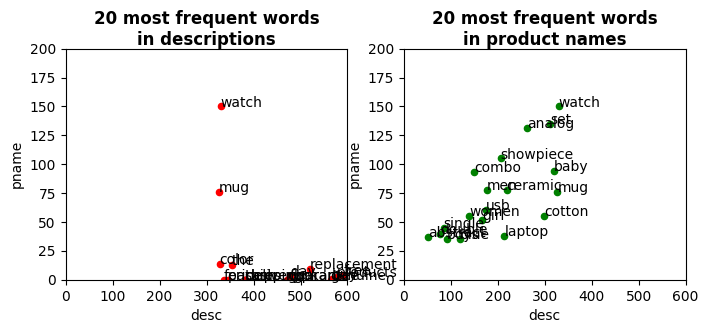

In [146]:
### Plot a comparative scatter plot of the frequencies of the top words 

n_most_freq = 20
fig = plt.figure(figsize=(8,3))

# Left : Most frequent words in the descriptions
ax1 = fig.add_subplot(1,2,1)
df1 = df_freq.sort_values('desc',
                    ascending=False).iloc[:n_most_freq]
df1.plot.scatter(x='desc', y='pname', color='red', ax=ax1)
ax1.set(xlim=(0,600), ylim=(0,200))

for i, txt in enumerate(list(df1.index)):
    ax1.annotate(txt, (df1['desc'].iloc[i],
                       df1['pname'].iloc[i]))
ax1.set_title(f'{n_most_freq} most frequent words\nin descriptions',
              fontweight='bold', pad=0.2)

# Right : Most frequent words in the product names
ax2 = fig.add_subplot(1,2,2)
df2 = df_freq.sort_values('pname',
                    ascending=False).iloc[:n_most_freq]
df2.plot.scatter(x='desc', y='pname', color='green', ax=ax2)
ax2.set(xlim=(0,600), ylim=(0,200))

for i, txt in enumerate(list(df2.index)):
    ax2.annotate(txt, (df2['desc'].iloc[i],
                      df2['pname'].iloc[i]))
ax2.set_title(f'{n_most_freq} most frequent words\nin product names',
              fontweight='bold', pad=0.2)

plt.subplots_adjust()
plt.show()

#### WordClouds by categories 

In [147]:

'''Takes the H matrix (topics/words) as a dataframe, extracts the n top words
and plots a wordcloud of the (n_top_words) top words for each topic.
'''

from wordcloud import WordCloud

def plot_wordclouds_from_H(H, n_top_words, n_rows=1, figsize=(18,8),
                             random_state=None):

    fig = plt.figure(figsize=figsize)
    wc = WordCloud(stopwords=None, background_color="black",
                   colormap="Dark2", max_font_size=150,
                   random_state=random_state)
    # boucle sur les thèmes
    for i, topic_name in enumerate(H.index,1):
        ser_10w_topic = H.loc[topic_name]\
            .sort_values(ascending=False)[0:n_top_words]
        wc.generate(' '.join(list(ser_10w_topic.index)))
        n_tot = H.index.shape[0]
        n_cols = (n_tot//n_rows)+((n_tot%n_rows)>0)*1
        ax = fig.add_subplot(n_rows,n_cols,i)
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.tight_layout()
        plt.title(topic_name, fontweight='bold')
        
    plt.show()
    

'''Takes a groupby made on a series of texts (non tokenized),
(-> for example : gb = data_T.groupby('category')['desc_bow'])
extracts the n top words and plots a wordcloud of the (n_top_words)
top words for each topic.
'''

import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_wordclouds_from_gb(gb, n_top_words, n_rows=1, figsize=(18,8),
                             backgnd_color='black', cmap='Dark2',
                            random_state=None):

    fig = plt.figure(figsize=figsize)

    for i, tup in enumerate(gb,1):
        n_topic, ser_texts = tup
        # creation of a corpus of all the cleaned descriptions and product_names
        corpus = ' '.join(ser_texts.values)
        # tokenizing the words in the cleaned corpus
        tokenizer = nltk.RegexpTokenizer(r'[a-z]+')
        li_words = tokenizer.tokenize(corpus.lower())
        # counting frequency of each word
        ser_freq = pd.Series(nltk.FreqDist(li_words))

        wc = WordCloud(stopwords=None, background_color=backgnd_color,
                        colormap=cmap, max_font_size=150,
                        random_state=14)
        ser_topic = ser_freq\
            .sort_values(ascending=False)[0:n_top_words]
        wc.generate(' '.join(list(ser_topic.index)))

        n_tot = len(gb)
        n_cols = (n_tot//n_rows)+((n_tot%n_rows)>0)*1
        ax = fig.add_subplot(n_rows,n_cols,i)
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.tight_layout()
        plt.title(n_topic, fontweight='bold')

In [148]:
gb = data_T.groupby('category')['desc_bow']

plot_wordclouds_from_gb(gb, n_top_words=10, n_rows=2, figsize=(15,5),
                        backgnd_color='beige', cmap='tab10', random_state=14)

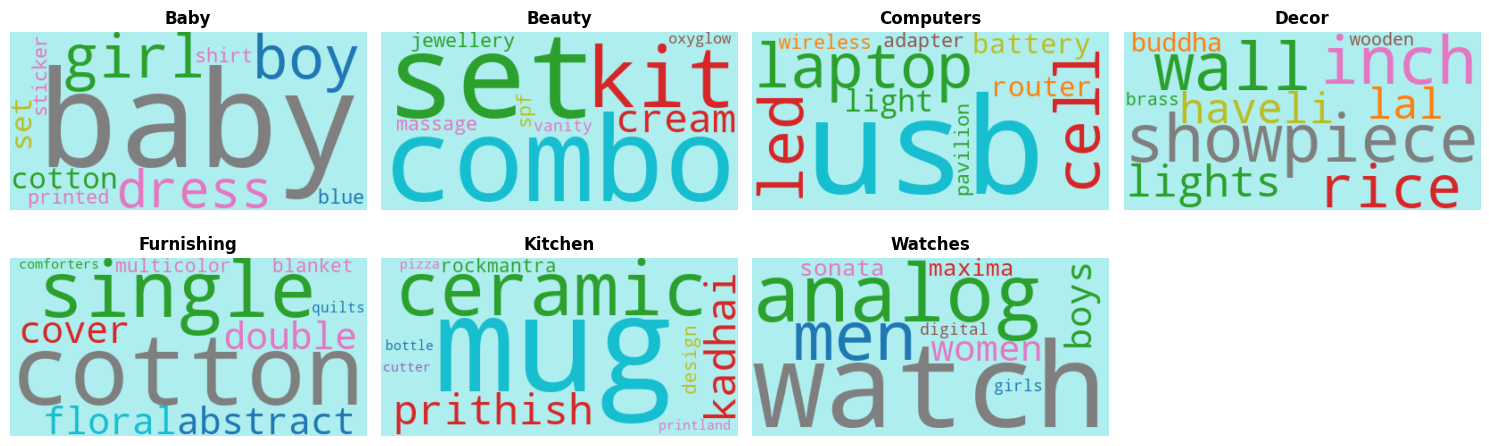

In [149]:
gb = data_T.groupby('category')['pname_bow']

plot_wordclouds_from_gb(gb, n_top_words=10, n_rows=2, figsize=(15,5),
                        backgnd_color='paleturquoise', cmap='tab10', random_state=14)

In [292]:
l_cat = list(set(data_T['category']))
print("catégories : ", l_cat)
y_cat_num = [(1-l_cat.index(data_T.iloc[i]['category'])) for i in range(len(data_T))]
print("y_cat_num : ", type(y_cat_num))

catégories :  ['Decor', 'Beauty', 'Furnishing', 'Baby', 'Kitchen', 'Computers', 'Watches']
y_cat_num :  <class 'list'>


In [151]:
from nltk.tokenize import sent_tokenize, word_tokenize

data_T['desc_length_bow'] = data_T['desc_bow'].apply(lambda x : len(word_tokenize(x)))
print("max description length bow : ", data_T['desc_length_bow'].max())
data_T['desc_length_dl'] = data_T['desc_dl'].apply(lambda x : len(word_tokenize(x)))
print("max description length dl : ", data_T['desc_length_dl'].max())


max description length bow :  361
max description length dl :  572


In [152]:
data_T['pname_length_bow'] = data_T['pname_bow'].apply(lambda x : len(word_tokenize(x)))
print("max product name length bow : ", data_T['pname_length_bow'].max())
data_T['pname_length_dl'] = data_T['pname_dl'].apply(lambda x : len(word_tokenize(x)))
print("max product name length dl : ", data_T['pname_length_dl'].max())

max product name length bow :  21
max product name length dl :  23


##### Application sur un exemple de description 

In [153]:
data_T.loc[0]['desc_bow']

'key features elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain height pack price this curtain enhances look interiors this curtain made high polyester fabric eyelet style stitch metal ring makes room environment romantic loving this curtain ant wrinkle anti shrinkage elegant apparance give home bright modernistic appeal designs the surreal attention sure steal hearts these contemporary eyelet valance curtains slide smoothly draw apart first thing morning welcome bright sun rays want wish good morning whole world draw close evening create special moments joyous beauty given soothing prints bring home elegant curtain softly filters light room get right amount sunlight specifications elegance polyester multicolor abstract eyelet door curtain height pack general brand elegance designed for door type eyelet model name abstract polyester door curtain set model duster color multicolor dimensions length box num

In [154]:
data_T.loc[0]['desc_length_bow']

151

In [155]:
data_T.head()

uniq_id    category   
0  55b85ea15a1536d46b7190ad6fff8ce7  Furnishing  \
1  7b72c92c2f6c40268628ec5f14c6d590        Baby   
2  64d5d4a258243731dc7bbb1eef49ad74        Baby   
3  d4684dcdc759dd9cdf41504698d737d8  Furnishing   
4  6325b6870c54cd47be6ebfbffa620ec7  Furnishing   

                                        product_name   
0  Elegance Polyester Multicolor Abstract Eyelet ...  \
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                                         description   
0  Key Features of Elegance Polyester Multicolor ...  \
1  Specifications of Sathiyas Cotton Bath Towel (...   
2  Key Features of Eurospa Cotton Terry Face Towe...   
3  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4  Key Features of Jaipur Print Cotton Floral Kin...   

                                            desc_bow   
0  key features elegance polyester multicolor abs...  \
1  specifications sathiyas cotton bath towel bath...   
2  key features eurospa cotton terry face towel s...   
3  key features santosh royal fashion cotton prin...   
4  key features jaipur print cotton floral king s...   

                                        desc_bow_lem   
0  key featur eleg polyest multicolor abstract ey...  \
1  specif sathiya cotton bath towel bath towel re...   
2  key featur eurospa cotton terri face towel set...   
3  key featur santosh royal fashion cotton print ...   
4  key featur jaipur print cotton floral king siz...   

                                             desc_dl   
0  key features of elegance polyester multicolor ...  \
1  specifications of sathiyas cotton bath towel b...   
2  key features of eurospa cotton terry face towe...   
3  key features of santosh royal fashion cotton p...   
4  key features of jaipur print cotton floral kin...   

                                           pname_bow   
0  elegance polyester multicolor abstract eyelet ...  \
1                         sathiyas cotton bath towel   
2                eurospa cotton terry face towel set   
3  santosh royal fashion cotton printed king size...   
4  jaipur print cotton floral king sized double b...   

                                       pname_bow_lem   
0  eleg polyest multicolor abstract eyelet door c...  \
1                          sathiya cotton bath towel   
2                eurospa cotton terri face towel set   
3  santosh royal fashion cotton print king size d...   
4  jaipur print cotton floral king size doubl bed...   

                                            pname_dl  desc_length_bow   
0  elegance polyester multicolor abstract eyelet ...              151  \
1                         sathiyas cotton bath towel               62   
2                eurospa cotton terry face towel set              150   
3  santosh royal fashion cotton printed king size...              107   
4  jaipur print cotton floral king sized double b...              143   

   desc_length_dl  pname_length_bow  pname_length_dl  
0             226                 7                7  
1              68                 4                4  
2             201                 6                6  
3             124                 9                9  
4             188                 8                8

In [156]:
data_T.columns

Index(['uniq_id', 'category', 'product_name', 'description', 'desc_bow',
       'desc_bow_lem', 'desc_dl', 'pname_bow', 'pname_bow_lem', 'pname_dl',
       'desc_length_bow', 'desc_length_dl', 'pname_length_bow',
       'pname_length_dl'],
      dtype='object')

#### Calcul des clusters

In [82]:
# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features,df) :
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=1000, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    #dataset avec clusters 
    
    kms = KMeans(n_clusters=num_labels, n_init=100, random_state=42).fit(X_tsne)
    data=df.drop(columns=['product_name', 'description', 'desc_bow',
       'desc_bow_lem', 'desc_dl', 'pname_bow', 'pname_bow_lem', 'pname_dl',
       'desc_length_bow', 'desc_length_dl', 'pname_length_bow',
       'pname_length_dl'])
    #data= df[['uniq_id', 'category']]
    data['Cluster'] = kms.labels_
    data['Cluster Centroid D1'] = data['Cluster'].apply(lambda label: kms.cluster_centers_[label][0])
    data['Cluster Centroid D2'] = data['Cluster'].apply(lambda label: kms.cluster_centers_[label][1])
    data['tsne1']=X_tsne[:,0]
    data['tsne2']=X_tsne[:,1]
    return ARI, X_tsne, cls.labels_,data

### Approche 1 : BoW et TF-IDF avec le fit et transform uniquement sur la description du produit 

In [294]:
# création du bag of words (CountVectorizer et Tf-idf)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'desc_bow_lem'
cv_fit = cvect.fit(data_T[feat])
ctf_fit = ctf.fit(data_T[feat])

cv_transform = cvect.transform(data_T[feat])  
ctf_transform = ctf.transform(data_T[feat])  

In [295]:
## Éxécution des modèles 
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels,df_clusters = ARI_fct(cv_transform,data_T)
print()
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels,df_clusters = ARI_fct(ctf_transform,data_T)

CountVectorizer : 
-----------------
ARI :  0.4255 time :  10.0

Tf-idf : 
--------
ARI :  0.5034 time :  8.0


Le score ARI avec TF-IDF est meilleur qu'avec CountVectorizer. 

In [296]:
df_clusters.head()

uniq_id    category  Cluster  Cluster Centroid D1   
0  55b85ea15a1536d46b7190ad6fff8ce7  Furnishing        3             12.84903  \
1  7b72c92c2f6c40268628ec5f14c6d590        Baby        3             12.84903   
2  64d5d4a258243731dc7bbb1eef49ad74        Baby        3             12.84903   
3  d4684dcdc759dd9cdf41504698d737d8  Furnishing        3             12.84903   
4  6325b6870c54cd47be6ebfbffa620ec7  Furnishing        3             12.84903   

   Cluster Centroid D2      tsne1      tsne2  
0           -21.572277   3.954182 -10.061445  
1           -21.572277  21.115211 -15.167038  
2           -21.572277  22.079277 -18.169996  
3           -21.572277   1.059348 -28.302635  
4           -21.572277   1.618813 -28.384804

In [297]:
df_clusters.shape

(1050, 7)

In [298]:
#Furnishing data
furnishing_cluster=df_clusters[df_clusters.category=='Furnishing']
furnishing_cluster.head()

uniq_id    category  Cluster   
0   55b85ea15a1536d46b7190ad6fff8ce7  Furnishing        3  \
3   d4684dcdc759dd9cdf41504698d737d8  Furnishing        3   
4   6325b6870c54cd47be6ebfbffa620ec7  Furnishing        3   
33  b85f8843bb1c297dd5712f0bd287006d  Furnishing        3   
34  a4b09aa7927c59fbb39960b3d7919909  Furnishing        3   

    Cluster Centroid D1  Cluster Centroid D2     tsne1      tsne2  
0              12.84903           -21.572277  3.954182 -10.061445  
3              12.84903           -21.572277  1.059348 -28.302635  
4              12.84903           -21.572277  1.618813 -28.384804  
33             12.84903           -21.572277  2.757987 -25.789696  
34             12.84903           -21.572277  2.895594 -23.175295

In [299]:
furnishing_cluster['Cluster'].unique()

array([3, 6, 1, 2, 0])

In [300]:
furnishing_cluster.shape[0]

150

In [301]:
#Summary furnishing data
sum_cluster_0=(furnishing_cluster['Cluster']==0).sum()/furnishing_cluster.shape[0]*100
sum_cluster_1=(furnishing_cluster['Cluster']==1).sum()/furnishing_cluster.shape[0]*100
sum_cluster_2=(furnishing_cluster['Cluster']==2).sum()/furnishing_cluster.shape[0]*100
sum_cluster_3=(furnishing_cluster['Cluster']==3).sum()/furnishing_cluster.shape[0]*100
sum_cluster_4=(furnishing_cluster['Cluster']==4).sum()/furnishing_cluster.shape[0]*100
sum_cluster_5=(furnishing_cluster['Cluster']==5).sum()/furnishing_cluster.shape[0]*100
sum_cluster_6=(furnishing_cluster['Cluster']==6).sum()/furnishing_cluster.shape[0]*100


summary_furnishing_cluster=pd.DataFrame([sum_cluster_0,sum_cluster_1,sum_cluster_2,sum_cluster_3,sum_cluster_4,sum_cluster_5,sum_cluster_6],index=[0,1,2,3,4,5,6],columns=["Percentage for Furnishing"])

summary_furnishing_cluster

Percentage for Furnishing
0                   2.666667
1                   0.666667
2                   3.333333
3                  92.000000
4                   0.000000
5                   0.000000
6                   1.333333

On va renommer le cluster 3 comme étant 'Furnishing'

In [302]:
df_clusters.category.unique()

array(['Furnishing', 'Baby', 'Watches', 'Decor', 'Kitchen', 'Beauty',
       'Computers'], dtype=object)

### Résultats du clustering

In [312]:
def summary(df):
    sum_cluster=np.zeros([7,7])
    filter_words=df.category.unique()
    
    for i in range (7):
        filter_cluster=df.copy()
        filter_cluster=filter_cluster[filter_cluster.category==filter_words[i]]
        for j in range(7):
            sum_cluster[i,j]=(filter_cluster['Cluster']==j).sum()/filter_cluster.shape[0]*100
    
    # Convert array to DataFrame
    array=sum_cluster.T
    summary = pd.DataFrame({'Furnishing (%)': array[:, 0], 'Baby (%)': array[:, 1], 'Watches (%)': array[:, 2],'Decor (%)': array[:, 3],'Kitchen (%)': array[:, 4],'Beauty (%)': array[:, 5], 'Computers (%)': array[:, 6] },index=[0,1,2,3,4,5,6])
    return summary

In [313]:
summary(df_clusters)

Furnishing (%)   Baby (%)  Watches (%)  Decor (%)  Kitchen (%)  Beauty (%)   
0        2.666667   6.000000          0.0   2.000000    12.666667   63.333333  \
1        0.666667   9.333333          0.0  74.666667    16.666667    7.333333   
2        3.333333  65.333333          0.0   4.666667    14.000000   10.000000   
3       92.000000  16.666667          0.0   7.333333     1.333333   12.666667   
4        0.000000   0.000000        100.0   2.666667     0.666667    0.000000   
5        0.000000   1.333333          0.0   0.666667    49.333333    0.000000   
6        1.333333   1.333333          0.0   8.000000     5.333333    6.666667   

   Computers (%)  
0      33.333333  
1       1.333333  
2       0.666667  
3       0.000000  
4       0.000000  
5       0.000000  
6      64.666667

#### Graphiques

In [317]:
color_dict = dict({'Furnishing':'brown',
                  'Baby':'green',
                  'Watches': 'orange',
                  'Decor': 'red',
                   'Kitchen': 'blue',
                   'Beauty': 'purple',
                   'Computers': 'pink'
                  })
def TSNE_visual(ARI,df,cluster_labels) :

    #remplacer labels avec les noms de catégories pour le dataset de clusters
    df= df.replace({'Cluster' : cluster_labels})
    
    
    fig, ax = plt.subplots(1, 2, figsize=(12,6))
    sns.scatterplot(data=df,x='tsne1',y='tsne2',hue='category',palette=color_dict,legend="full",alpha=0.9,ax=ax[0])
    ax[0].set_title('Représentation des catégories de produits par catégories réelles')
    sns.scatterplot(data=df,x='tsne1',y='tsne2',hue='Cluster',palette=color_dict, legend="full",alpha=0.9,ax=ax[1])
    ax[1].set_title('Représentation des catégories de produits par clusters')
    fig.suptitle('Comparaison des catégories de produits réelles et les catégories attribuées par clustering')
    
    plt.show()
    print("ARI : ", ARI)

In [318]:
cluster_labels={0:'Beauty', 1:'Decor',2:'Baby',3:'Furnishing',4:'Watches',5:'Kitchen',6:'Computers'}
TSNE_visual(ARI,df_clusters,cluster_labels)

ARI :  0.5034


In [258]:
# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI,correct_labels,df) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    #scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=df['category'].map(colors), cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation des produits par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    #ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    ax.legend(handles=scatter.legend_elements()[0], labels=correct_labels, loc="best", title="Clusters")
    plt.title('Représentation des catégories de produits par clusters')
    
    plt.show()
    print("ARI : ", ARI)

### Approche 2 : BoW et TF-IDF avec le fit et transform uniquement sur « product_name » + « description »

In [319]:
cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat_1= 'pname_bow_lem'
feat_2= 'desc_bow_lem'

cv_fit = cvect.fit(data_T[feat_1]+ data_T[feat_2])
ctf_fit = ctf.fit(data_T[feat_1]+ data_T[feat_2])

cv_transform = cvect.transform(data_T[feat_1]+ data_T[feat_2]) 
ctf_transform = ctf.transform(data_T[feat_1]+ data_T[feat_2]) 

In [321]:
## Éxécution des modèles 
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels,df_clusters = ARI_fct(cv_transform,data_T)
print()
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels,df_clusters = ARI_fct(ctf_transform,data_T)

CountVectorizer : 
-----------------
ARI :  0.4619 time :  10.0

Tf-idf : 
--------
ARI :  0.5054 time :  9.0


In [322]:
summary(df_clusters)

Furnishing (%)   Baby (%)  Watches (%)  Decor (%)  Kitchen (%)  Beauty (%)   
0        0.000000   0.000000    98.666667   2.666667     2.666667    0.000000  \
1        0.000000   3.333333     0.000000   2.666667    56.666667    0.000000   
2       74.666667   8.666667     0.000000   0.666667    11.333333    9.333333   
3        0.000000   5.333333     0.000000   1.333333     2.666667   67.333333   
4        0.666667   9.333333     0.000000  78.666667     2.666667    7.333333   
5        2.666667   2.666667     1.333333  12.666667    23.333333    4.666667   
6       22.000000  70.666667     0.000000   1.333333     0.666667   11.333333   

   Computers (%)  
0       2.666667  
1       0.000000  
2       0.000000  
3      35.333333  
4       1.333333  
5      60.666667  
6       0.000000

In [323]:
# Graphiques
cluster_labels={0:'Watches', 1:'Kitchen',2:'Furnishing',3:'Beauty',4:'Decor',5:'Computers',6:'Baby'}
TSNE_visual(ARI,df_clusters,cluster_labels)

ARI :  0.5054


### Approche 3 : BoW et TF-IDF avec le fit sur « product_name » et transform sur « product_name » + « description » 

Cette approche permet de ne garder que le vocabulaire des « product_name » moins verbeux, et de renforcer le comptage avec le contenu de « description ».

In [324]:
cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat_1= 'pname_bow_lem'
feat_2= 'desc_bow_lem'

cv_fit = cvect.fit(data_T[feat_1])
ctf_fit = ctf.fit(data_T[feat_1])

cv_transform = cvect.transform(data_T[feat_1]+ data_T[feat_2]) 
ctf_transform = ctf.transform(data_T[feat_1]+ data_T[feat_2]) 


## Éxécution des modèles 
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels,df_clusters = ARI_fct(cv_transform,data_T)
print()
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels,df_clusters = ARI_fct(ctf_transform,data_T)

CountVectorizer : 
-----------------
ARI :  0.4191 time :  10.0

Tf-idf : 
--------
ARI :  0.4396 time :  10.0


In [325]:
summary(df_clusters)

Furnishing (%)   Baby (%)  Watches (%)  Decor (%)  Kitchen (%)  Beauty (%)   
0        4.666667  12.000000     0.000000  64.666667    23.333333    9.333333  \
1        2.666667   3.333333     0.000000  16.000000     6.000000   61.333333   
2        0.000000   0.000000     0.000000   6.666667    10.000000    1.333333   
3        0.000000   4.666667    99.333333   5.333333     2.000000    8.666667   
4        1.333333   2.000000     0.666667   3.333333    50.000000    6.666667   
5       18.666667  68.000000     0.000000   2.000000     8.666667   12.000000   
6       72.666667  10.000000     0.000000   2.000000     0.000000    0.666667   

   Computers (%)  
0       1.333333  
1      35.333333  
2      62.666667  
3       0.000000  
4       0.666667  
5       0.000000  
6       0.000000

In [326]:
# Graphiques
cluster_labels={0:'Decor', 1:'Beauty',2:'Computers',3:'Watches',4:'Kitchen',5:'Baby',6:'Furnishing'}
TSNE_visual(ARI,df_clusters,cluster_labels)

ARI :  0.4396


#### Limitations de Bag-of-Words


Le bag of words est très simple à comprendre et à mettre en œuvre et offre une grande flexibilité pour la personnalisation de vos données textuelles spécifiques.

Il a été utilisé avec beaucoup de succès sur des problèmes de prédiction comme la modélisation du langage et la classification de la documentation.

Néanmoins, il souffre de quelques défauts, tels que :

- Vocabulaire : Le vocabulaire nécessite une conception soignée, notamment pour gérer la taille, ce qui impacte la parcimonie (sparsity) des représentations des documents.

- La parcimonie : les représentations parcimonieuses sont plus difficiles à modéliser à la fois pour des raisons de calcul (complexité spatiale et temporelle) et aussi pour des raisons d'information, où le défi consiste pour les modèles à exploiter si peu d'informations dans un si grand espace de représentation.

- Signification : ignorer l'ordre des mots ignore le contexte et, par conséquent, la signification des mots dans le document (sémantique). Le contexte et la signification peuvent offrir beaucoup au modèle, qui, s'il était modélisé, pourrait faire la différence entre les mêmes mots disposés différemment ("c'est intéressant" vs "c'est intéressant"), les synonymes ("vieux vélo" vs "vélo d'occasion") , et beaucoup plus.


## 2. Word2vec


In [327]:
!pip3 show tensorflow

Name: tensorflow
Version: 2.12.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\kherm\anaconda\envs\notebook_text\lib\site-packages
Requires: tensorflow-intel
Required-by: 


In [328]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

### Approche 1 : Création du modèle Word2Vec avec les descriptions de produits

In [329]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 24 # adapt to length of sentences
sentences = data_T['desc_bow_lem'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [330]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 3922
Word2Vec trained


In [331]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 3923


#### Création de la matrice d'embedding

In [332]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (3923, 300)


#### Création du modèle d'embedding

In [333]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 24)]              0         
                                                                 
 embedding (Embedding)       (None, 24, 300)           1176900   
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 1,176,900
Trainable params: 1,176,900
Non-trainable params: 0
_________________________________________________________________


#### Éxécution du modèle 

In [334]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 0s 1ms/step


(1050, 300)

In [335]:
ARI, X_tsne, labels,df_clusters = ARI_fct(embeddings,data_T)

ARI :  0.2083 time :  7.0


In [336]:
summary(df_clusters)

Furnishing (%)   Baby (%)  Watches (%)  Decor (%)  Kitchen (%)  Beauty (%)   
0        0.000000   9.333333     0.000000  50.666667    32.000000   14.000000  \
1       20.000000   8.666667     3.333333  24.000000    42.000000   11.333333   
2        0.000000   0.000000    53.333333   0.000000     0.000000    0.000000   
3       49.333333  16.666667     0.000000   0.000000     0.666667    0.000000   
4        0.000000   0.000000     2.000000   0.000000     1.333333   53.333333   
5        0.000000   0.000000    34.000000   0.000000     0.000000    0.000000   
6       30.666667  65.333333     7.333333  25.333333    24.000000   21.333333   

   Computers (%)  
0      17.333333  
1      20.666667  
2       0.000000  
3       0.000000  
4      46.666667  
5       0.000000  
6      15.333333

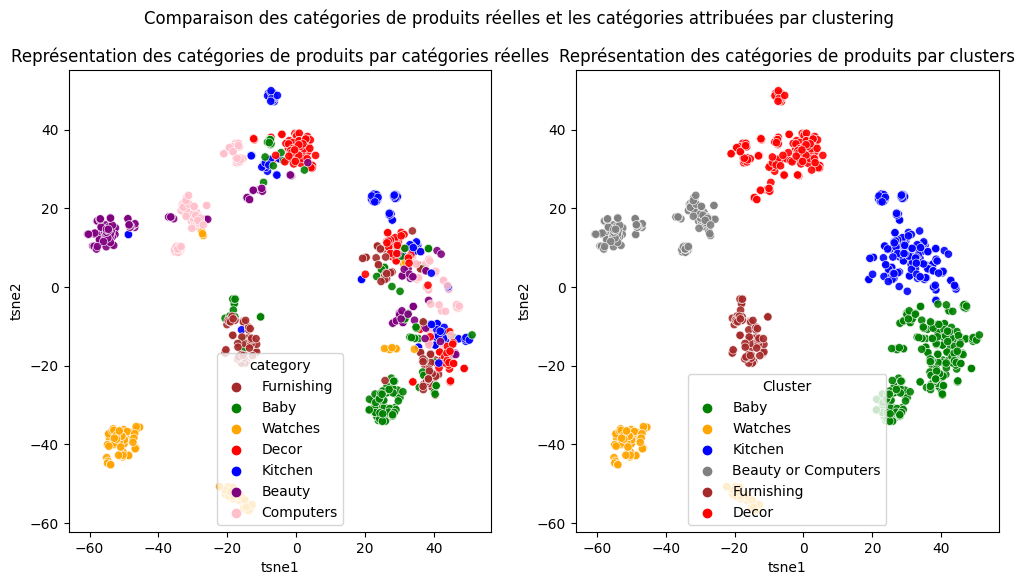

ARI :  0.2083


In [338]:
# Graphiques
color_dict = dict({'Furnishing':'brown',
                  'Baby':'green',
                  'Watches': 'orange',
                  'Decor': 'red',
                   'Kitchen': 'blue',
                   'Beauty': 'purple',
                   'Computers': 'pink',
                   'Beauty or Computers':'grey'
                  })
cluster_labels={0:'Decor', 1:'Kitchen',2:'Watches',3:'Furnishing',4:'Beauty or Computers',5:'Watches',6:'Baby'}
TSNE_visual(ARI,df_clusters,cluster_labels)

### Approche 2 : Création du modèle Word2Vec avec les noms de produits 

In [339]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 24 # adapt to length of sentences
sentences = data_T['pname_bow_lem'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [340]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 1788
Word2Vec trained


In [341]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 1789


In [342]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (1789, 300)


In [343]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 24)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 24, 300)           536700    
                                                                 
 global_average_pooling1d_1   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 536,700
Trainable params: 536,700
Non-trainable params: 0
_________________________________________________________________


In [344]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 0s 2ms/step


(1050, 300)

In [345]:
ARI, X_tsne, labels, df_clusters = ARI_fct(embeddings, data_T)

ARI :  0.4811 time :  8.0


In [346]:
summary(df_clusters)

Furnishing (%)   Baby (%)  Watches (%)  Decor (%)  Kitchen (%)  Beauty (%)   
0        6.666667  14.000000     0.000000  17.333333    32.000000   26.666667  \
1       92.000000  18.666667     0.000000   0.666667     2.000000    1.333333   
2        0.000000   0.000000    95.333333   0.000000     0.000000    0.666667   
3        1.333333  12.000000     4.666667  80.666667    16.666667    9.333333   
4        0.000000  53.333333     0.000000   0.000000     0.000000    0.000000   
5        0.000000   1.333333     0.000000   0.000000     0.000000   62.000000   
6        0.000000   0.666667     0.000000   1.333333    49.333333    0.000000   

   Computers (%)  
0           70.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  
5           30.0  
6            0.0

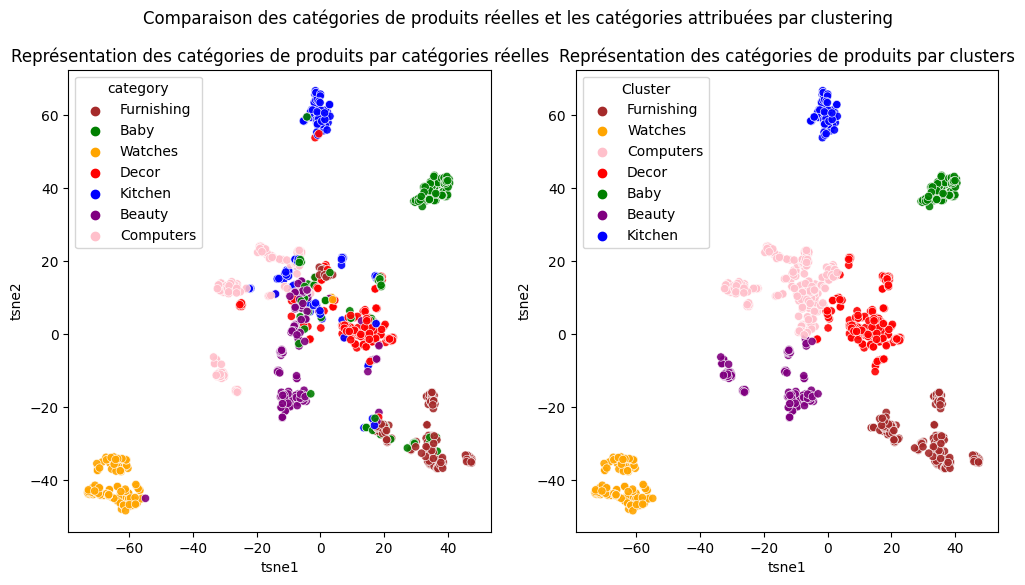

ARI :  0.4811


In [347]:
color_dict = dict({'Furnishing':'brown',
                  'Baby':'green',
                  'Watches': 'orange',
                  'Decor': 'red',
                   'Kitchen': 'blue',
                   'Beauty': 'purple',
                   'Computers': 'pink'
                  })

cluster_labels={0:'Computers', 1:'Furnishing',2:'Watches',3:'Decor',4:'Baby',5:'Beauty',6:'Kitchen'}
TSNE_visual(ARI,df_clusters,cluster_labels)

## 3. BERT 

In [348]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

C:\Users\kherm\anaconda\envs\Notebook_text\lib\site-packages\transformers\generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(


In [349]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.12.0
2.12.0
Num GPUs Available:  0
False


In [350]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

### BERT Hugging face 

#### 'bert-base-uncased'

In [351]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = data_T['desc_dl'].to_list()

C:\Users\kherm\anaconda\envs\Notebook_text\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\kherm\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [352]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

1/1 [==============================] - 1s 1s/step
temps traitement :  160.0


In [353]:
ARI, X_tsne, labels,df_clusters = ARI_fct(features_bert,data_T)

ARI :  0.3278 time :  8.0


In [354]:
summary(df_clusters)

Furnishing (%)   Baby (%)  Watches (%)  Decor (%)  Kitchen (%)  Beauty (%)   
0        2.666667   9.333333     0.000000  57.333333    36.666667   14.666667  \
1       21.333333   6.000000     2.666667  28.000000    50.000000   12.000000   
2        0.000000   3.333333    89.333333   0.000000     0.000000    0.000000   
3        0.000000   4.666667     0.000000   0.000000     2.000000   54.000000   
4        2.000000   4.000000     8.000000   4.000000     4.666667    4.000000   
5       49.333333   9.333333     0.000000   0.000000     0.000000    0.000000   
6       24.666667  63.333333     0.000000  10.666667     6.666667   15.333333   

   Computers (%)  
0       6.000000  
1       0.666667  
2       0.000000  
3      45.333333  
4      39.333333  
5       0.000000  
6       8.666667

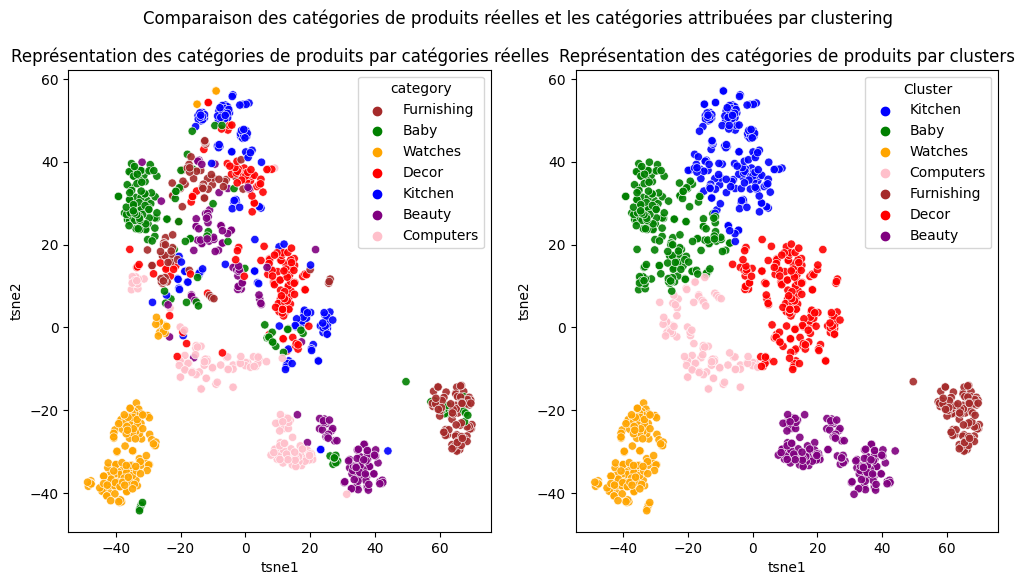

ARI :  0.3278


In [355]:
color_dict = dict({'Furnishing':'brown',
                  'Baby':'green',
                  'Watches': 'orange',
                  'Decor': 'red',
                   'Kitchen': 'blue',
                   'Beauty': 'purple',
                   'Computers': 'pink'
                  })

cluster_labels={0:'Decor', 1:'Kitchen',2:'Watches',3:'Beauty',4:'Computers',5:'Furnishing',6:'Baby'}
TSNE_visual(ARI,df_clusters,cluster_labels)

### BERT hub Tensorflow

import tensorflow_hub as hub
import tensorflow_text 

# Guide sur le Tensorflow hub : https://www.tensorflow.org/text/tutorials/classify_text_with_bert
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

## 4. USE - Universal Sentence Encoder

In [357]:
!pip install tensorflow_hub

  Using cached tensorflow_hub-0.13.0-py2.py3-none-any.whl (100 kB)


In [358]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embeddings = embed([
    "The quick brown fox jumps over the lazy dog.",
    "I am a sentence for which I would like to get its embedding"])

print(embeddings)

tf.Tensor(
[[-0.03133016 -0.06338632 -0.01607501 ... -0.03242781 -0.04575741
   0.05370456]
 [ 0.05080862 -0.01652432  0.01573779 ...  0.00976659  0.0317012
   0.01788118]], shape=(2, 512), dtype=float32)


In [359]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [360]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.12.0
2.12.0
Num GPUs Available:  0
False


In [361]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [363]:
data_T.head()

uniq_id    category   
0  55b85ea15a1536d46b7190ad6fff8ce7  Furnishing  \
1  7b72c92c2f6c40268628ec5f14c6d590        Baby   
2  64d5d4a258243731dc7bbb1eef49ad74        Baby   
3  d4684dcdc759dd9cdf41504698d737d8  Furnishing   
4  6325b6870c54cd47be6ebfbffa620ec7  Furnishing   

                                        product_name   
0  Elegance Polyester Multicolor Abstract Eyelet ...  \
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                                         description   
0  Key Features of Elegance Polyester Multicolor ...  \
1  Specifications of Sathiyas Cotton Bath Towel (...   
2  Key Features of Eurospa Cotton Terry Face Towe...   
3  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4  Key Features of Jaipur Print Cotton Floral Kin...   

                                            desc_bow   
0  key features elegance polyester multicolor abs...  \
1  specifications sathiyas cotton bath towel bath...   
2  key features eurospa cotton terry face towel s...   
3  key features santosh royal fashion cotton prin...   
4  key features jaipur print cotton floral king s...   

                                        desc_bow_lem   
0  key featur eleg polyest multicolor abstract ey...  \
1  specif sathiya cotton bath towel bath towel re...   
2  key featur eurospa cotton terri face towel set...   
3  key featur santosh royal fashion cotton print ...   
4  key featur jaipur print cotton floral king siz...   

                                             desc_dl   
0  key features of elegance polyester multicolor ...  \
1  specifications of sathiyas cotton bath towel b...   
2  key features of eurospa cotton terry face towe...   
3  key features of santosh royal fashion cotton p...   
4  key features of jaipur print cotton floral kin...   

                                           pname_bow   
0  elegance polyester multicolor abstract eyelet ...  \
1                         sathiyas cotton bath towel   
2                eurospa cotton terry face towel set   
3  santosh royal fashion cotton printed king size...   
4  jaipur print cotton floral king sized double b...   

                                       pname_bow_lem   
0  eleg polyest multicolor abstract eyelet door c...  \
1                          sathiya cotton bath towel   
2                eurospa cotton terri face towel set   
3  santosh royal fashion cotton print king size d...   
4  jaipur print cotton floral king size doubl bed...   

                                            pname_dl  desc_length_bow   
0  elegance polyester multicolor abstract eyelet ...              151  \
1                         sathiyas cotton bath towel               62   
2                eurospa cotton terry face towel set              150   
3  santosh royal fashion cotton printed king size...              107   
4  jaipur print cotton floral king sized double b...              143   

   desc_length_dl  pname_length_bow  pname_length_dl  
0             226                 7                7  
1              68                 4                4  
2             201                 6                6  
3             124                 9                9  
4             188                 8                8

In [368]:
batch_size = 10
sentences = data_T['pname_dl'].to_list()

In [369]:
features_USE = feature_USE_fct(sentences, batch_size)

In [370]:
ARI, X_tsne, labels,df_clusters = ARI_fct(features_USE,data_T)

ARI :  0.6387 time :  8.0


In [371]:
summary(df_clusters)

Furnishing (%)   Baby (%)  Watches (%)  Decor (%)  Kitchen (%)  Beauty (%)   
0        2.666667   3.333333          0.0  76.666667    20.000000    2.666667  \
1        0.000000   0.666667        100.0   2.000000     0.000000    2.000000   
2        0.000000  56.666667          0.0   0.666667     0.000000    1.333333   
3        0.000000   5.333333          0.0   1.333333    13.333333   92.000000   
4        0.666667  10.666667          0.0  16.000000    59.333333    0.666667   
5        0.000000   0.000000          0.0   0.000000     4.666667    0.000000   
6       96.666667  23.333333          0.0   3.333333     2.666667    1.333333   

   Computers (%)  
0       0.666667  
1       0.000000  
2       0.000000  
3      12.000000  
4       0.666667  
5      86.666667  
6       0.000000

In [372]:
color_dict = dict({'Furnishing':'brown',
                  'Baby':'green',
                  'Watches': 'orange',
                  'Decor': 'red',
                   'Kitchen': 'blue',
                   'Beauty': 'purple',
                   'Computers': 'pink'
                  })

cluster_labels={0:'Decor', 1:'Watches',2:'Baby',3:'Beauty',4:'Kitchen',5:'Computers',6:'Furnishing'}
TSNE_visual(ARI,df_clusters,cluster_labels)

ARI :  0.6387


# Conclusion
Nous pouvons conclure que tous les algorithmes de classification prennent pas beaucoup de temps et sont temporellement équivalents. Le meilleur modèle de classification on-supervisée est le USE car in a un meilleur scor d'ARI. Les 